# **This is a Individual Project and here is my individual notebook:-**


1.   **Soumya R. Mishra**




# <b><u> Project Title </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# <b> Data Description </b>

 <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor




from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from xgboost import XGBRFRegressor



from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor






import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing the dataset
dataset_x = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation - Capstone Project/Online Retail.xlsx')

In [4]:
dataset = dataset_x.sample(100000, random_state = 42)

In [5]:
df_fix=dataset_x.sample(100000, random_state = 42)

In [6]:
dataset.head()

InvoiceNo StockCode  ... CustomerID         Country
209268    555200     71459  ...    17315.0  United Kingdom
207108    554974     21128  ...    14031.0  United Kingdom
167085    550972     21086  ...    14031.0  United Kingdom
471836    576652     22812  ...    17198.0  United Kingdom
115865    546157     22180  ...    13502.0  United Kingdom

[5 rows x 8 columns]

In [7]:
dataset.shape

(100000, 8)

In [8]:
dataset.head()

InvoiceNo StockCode  ... CustomerID         Country
209268    555200     71459  ...    17315.0  United Kingdom
207108    554974     21128  ...    14031.0  United Kingdom
167085    550972     21086  ...    14031.0  United Kingdom
471836    576652     22812  ...    17198.0  United Kingdom
115865    546157     22180  ...    13502.0  United Kingdom

[5 rows x 8 columns]

# **Data Inspection**

In [9]:
# First look
dataset.head()

InvoiceNo StockCode  ... CustomerID         Country
209268    555200     71459  ...    17315.0  United Kingdom
207108    554974     21128  ...    14031.0  United Kingdom
167085    550972     21086  ...    14031.0  United Kingdom
471836    576652     22812  ...    17198.0  United Kingdom
115865    546157     22180  ...    13502.0  United Kingdom

[5 rows x 8 columns]

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 209268 to 290024
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  object        
 1   StockCode    100000 non-null  object        
 2   Description  99723 non-null   object        
 3   Quantity     100000 non-null  int64         
 4   InvoiceDate  100000 non-null  datetime64[ns]
 5   UnitPrice    100000 non-null  float64       
 6   CustomerID   74983 non-null   float64       
 7   Country      100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.9+ MB


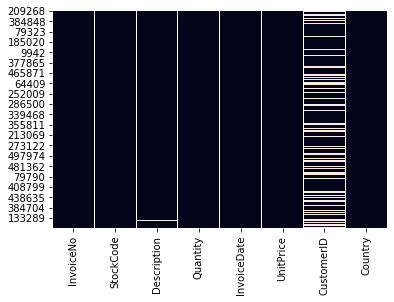

In [11]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

In [12]:
dataset['Description'].isnull().sum()

277

# **DataSet Information**

In [13]:
dataset['InvoiceDate_year'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceDate_month'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceDate_day'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceDate_hour'] = dataset['InvoiceDate'].dt.hour
dataset['InvoiceDate_minute'] = dataset['InvoiceDate'].dt.minute
dataset['InvoiceDate_second'] = dataset['InvoiceDate'].dt.second


In [14]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [15]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [16]:
dataset.shape

(100000, 14)

In [17]:
dataset.describe(include='all')

InvoiceNo StockCode  ... InvoiceDate_minute  InvoiceDate_second
count    100000.0    100000  ...      100000.000000            100000.0
unique    17962.0      3610  ...                NaN                 NaN
top      573585.0    85123A  ...                NaN                 NaN
freq        221.0       433  ...                NaN                 NaN
first         NaN       NaN  ...                NaN                 NaN
last          NaN       NaN  ...                NaN                 NaN
mean          NaN       NaN  ...          29.983010                 0.0
std           NaN       NaN  ...          16.985543                 0.0
min           NaN       NaN  ...           0.000000                 0.0
25%           NaN       NaN  ...          16.000000                 0.0
50%           NaN       NaN  ...          30.000000                 0.0
75%           NaN       NaN  ...          44.000000                 0.0
max           NaN       NaN  ...          59.000000                 0.0

[13 rows x 14 columns]

In [18]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [19]:
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [20]:
def unique_name_no(col):
  print(dataset[col].unique())
  print(dataset[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[555200 554974 550972 ... 568460 'C558313' 560929]
17962
STOCKCODE
[71459 21128 21086 ... '90042A' '16169P' 72811]
3610
DESCRIPTION
['HANGING JAM JAR T-LIGHT HOLDER' 'GOLD FISHING GNOME'
 'SET/6 RED SPOTTY PAPER CUPS' ... 'CHEST NATURAL WOOD 20 DRAWERS'
 'FRESHWATER PEARL BRACELET GOLD' 'SMALL ZINC/GLASS CANDLEHOLDER']
3697
COUNTRY
['United Kingdom' 'Australia' 'Norway' 'Finland' 'Germany' 'Bahrain'
 'EIRE' 'Spain' 'France' 'Canada' 'RSA' 'Netherlands' 'Italy' 'Austria'
 'Channel Islands' 'Unspecified' 'Sweden' 'Belgium' 'Portugal' 'USA'
 'Cyprus' 'Poland' 'Switzerland' 'Japan' 'Denmark' 'Hong Kong' 'Iceland'
 'Singapore' 'Israel' 'United Arab Emirates' 'Greece' 'Lithuania'
 'European Community' 'Malta' 'Saudi Arabia' 'Lebanon' 'Czech Republic'
 'Brazil']
38


In [21]:
# duplicate
len(dataset[dataset.duplicated()])

200

In [22]:
dataset[dataset.duplicated()]

InvoiceNo StockCode  ... InvoiceDate_minute  InvoiceDate_second
270266    560555     20984  ...                  1                   0
510482    579456     22624  ...                 20                   0
213179    555524     22697  ...                 37                   0
370967    569205     22624  ...                 55                   0
375246    569424     22436  ...                 49                   0
...          ...       ...  ...                ...                 ...
409368    572058     22907  ...                 43                   0
360382    568226     23232  ...                 39                   0
504413    578949     22629  ...                 30                   0
49635     540524     84755  ...                 53                   0
242308    558330    84596B  ...                 16                   0

[200 rows x 14 columns]

In [23]:
### Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [24]:
dataset.shape

(99800, 14)

In [25]:
dataset.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description             277
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID            25017
Country                   0
InvoiceDate_year          0
InvoiceDate_month         0
InvoiceDate_day           0
InvoiceDate_hour          0
InvoiceDate_minute        0
InvoiceDate_second        0
dtype: int64

***There are 541909 rows and 8 columns in above dataset.***

***Above dataset has  missing value on Description & CustomerID.***

***Above dataset has 5268 duplicate value.***


# **Missing Value Imputation**

**Handle Category Imputation**

**Frequent Category Imputation**

In [26]:
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [27]:
impute_nan(dataset,"Description")

**Handle Numerical Imputation**

**Random Sample Imputation (MCAR)**

In [28]:
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
impute_nan_numeric(dataset,'CustomerID')
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [30]:
dataset.isnull().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
UnitPrice             0
Country               0
InvoiceDate_year      0
InvoiceDate_month     0
InvoiceDate_day       0
InvoiceDate_hour      0
InvoiceDate_minute    0
InvoiceDate_second    0
CustomerID_random     0
dtype: int64

In [31]:
dataset.head()

InvoiceNo StockCode  ... InvoiceDate_second  CustomerID_random
209268    555200     71459  ...                  0            17315.0
207108    554974     21128  ...                  0            14031.0
167085    550972     21086  ...                  0            14031.0
471836    576652     22812  ...                  0            17198.0
115865    546157     22180  ...                  0            13502.0

[5 rows x 14 columns]

In [32]:
dataset.shape

(99800, 14)

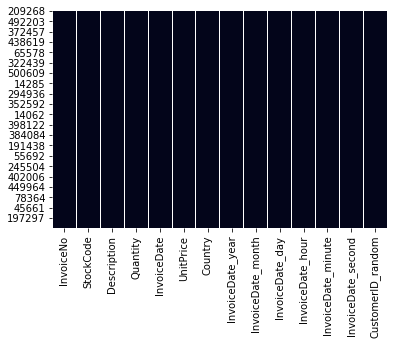

In [33]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

# **Exploratory Data Analysis**

## **Handling Numeric Features**

In [ ]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

**Univariate Analysis**

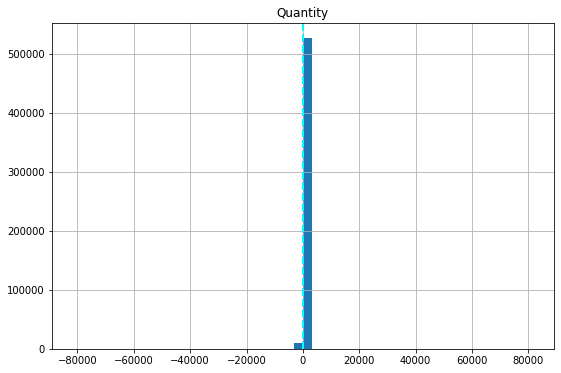

Skewness : -0.2639207787329176
Kurtosis : 118645.54455234332


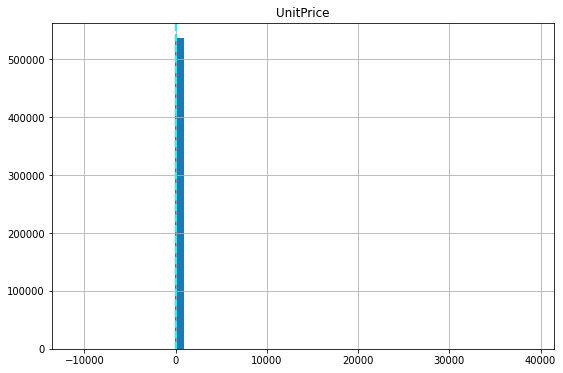

Skewness : 185.60044812920344
Kurtosis : 58433.135910585086


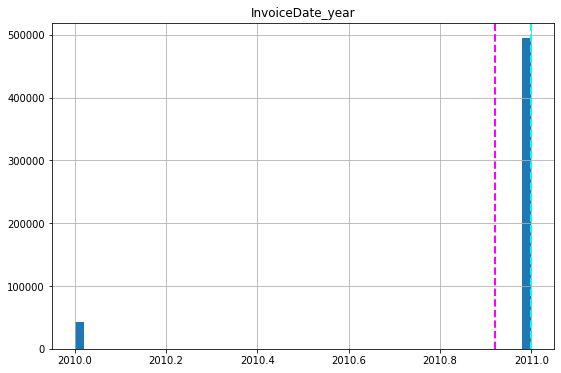

Skewness : -3.1413170786444153
Kurtosis : 7.867902311346793


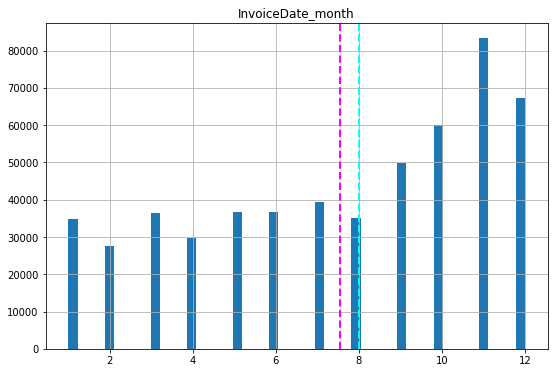

Skewness : -0.4112397637662981
Kurtosis : -1.121688905682585


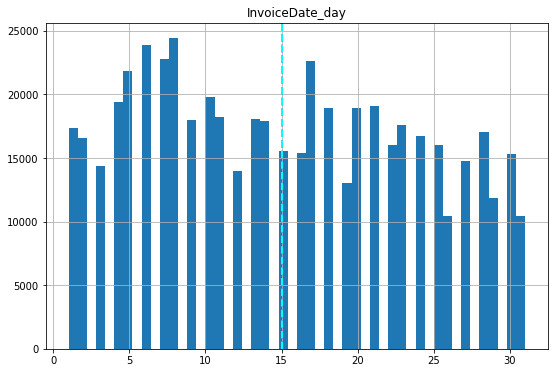

Skewness : 0.1425060392658862
Kurtosis : -1.1573667360751423


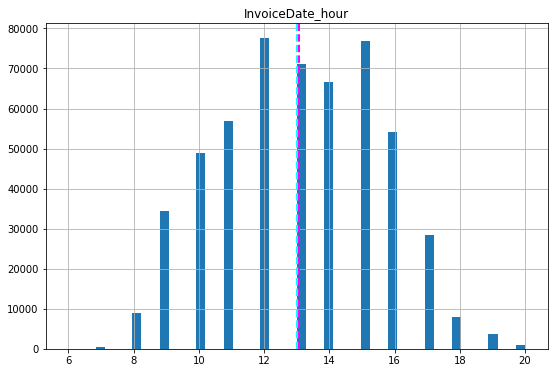

Skewness : 0.002850657774814659
Kurtosis : -0.6944981623468869


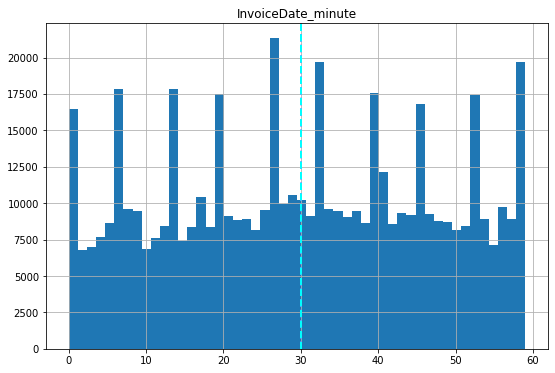

Skewness : -0.02534037213860687
Kurtosis : -1.136943576846362


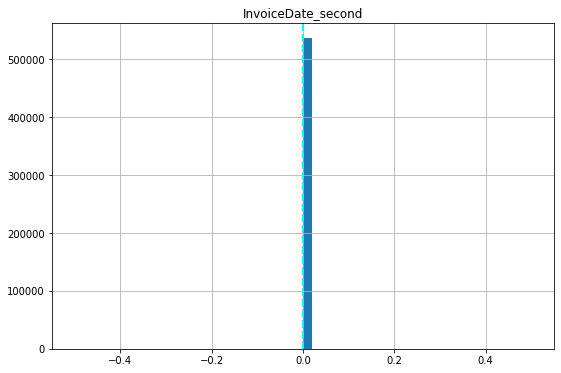

Skewness : 0
Kurtosis : 0


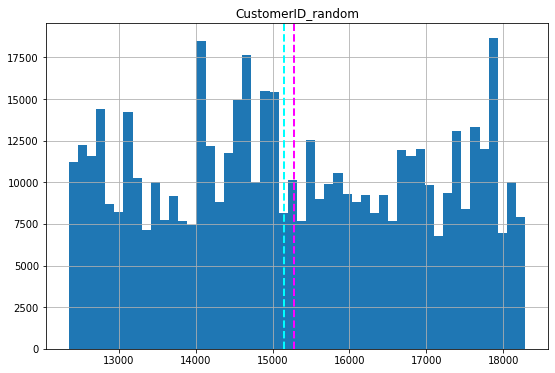

Skewness : 0.03468049946828383
Kurtosis : -1.179793510437348


In [ ]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

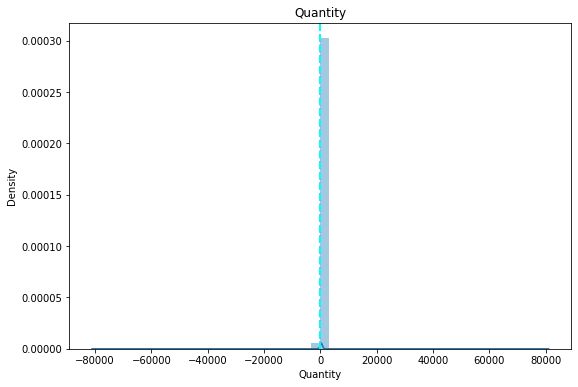

Skewness : -0.2639207787329176
Kurtosis : 118645.54455234332


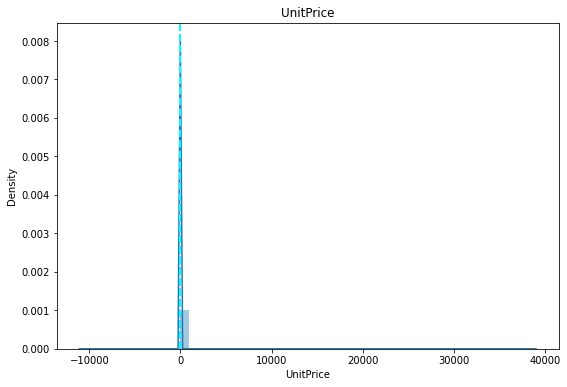

Skewness : 185.60044812920344
Kurtosis : 58433.135910585086


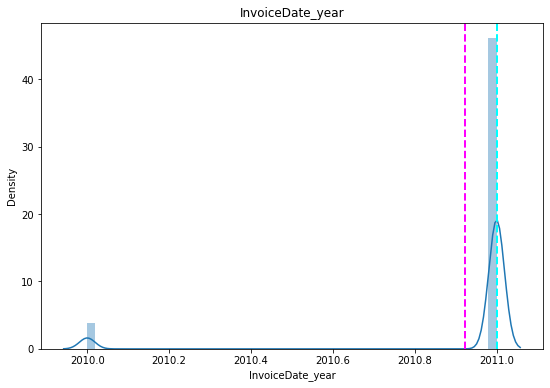

Skewness : -3.1413170786444153
Kurtosis : 7.867902311346793


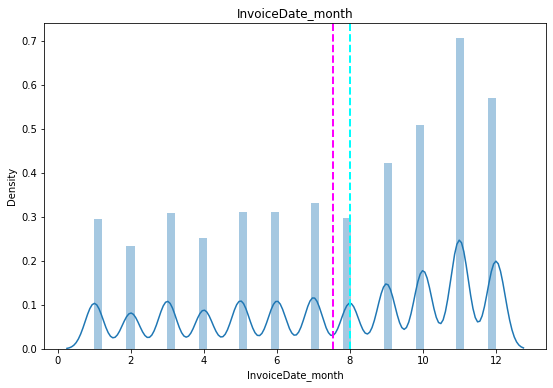

Skewness : -0.4112397637662981
Kurtosis : -1.121688905682585


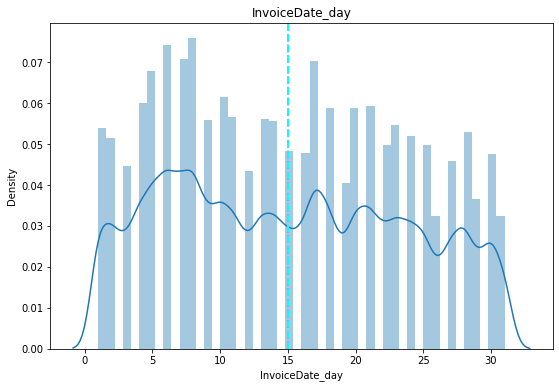

Skewness : 0.1425060392658862
Kurtosis : -1.1573667360751423


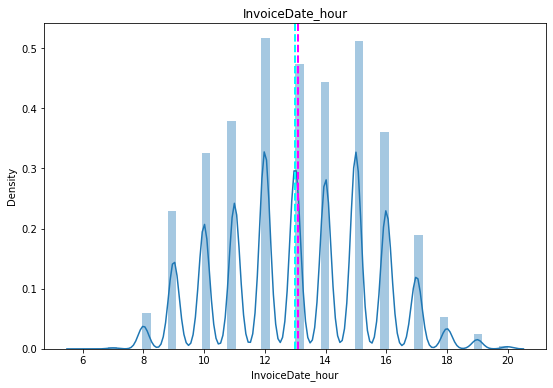

Skewness : 0.002850657774814659
Kurtosis : -0.6944981623468869


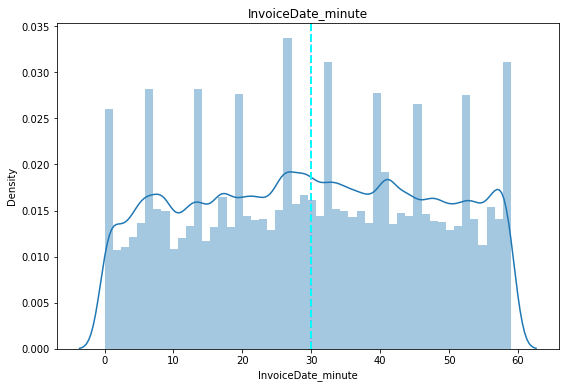

Skewness : -0.02534037213860687
Kurtosis : -1.136943576846362


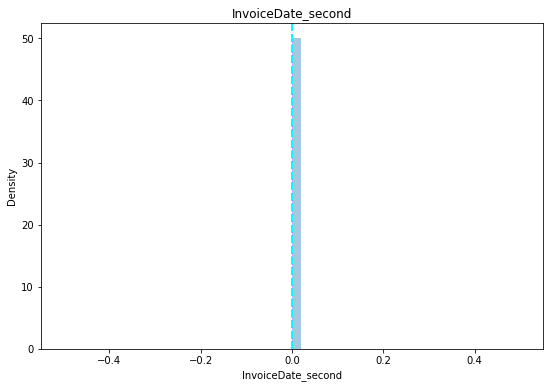

Skewness : 0
Kurtosis : 0


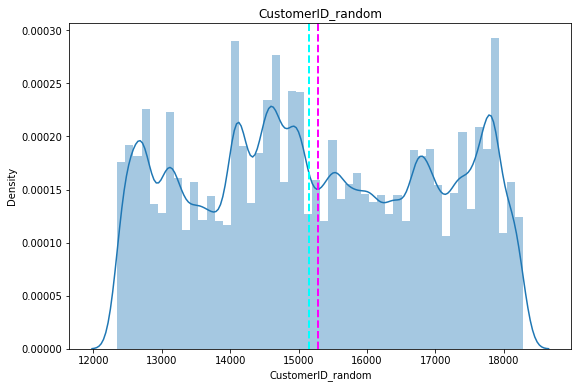

Skewness : 0.03468049946828383
Kurtosis : -1.179793510437348


In [ ]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

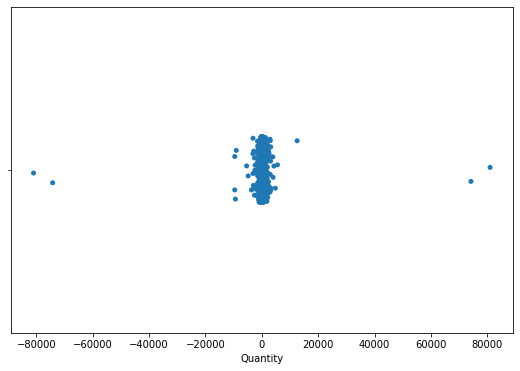

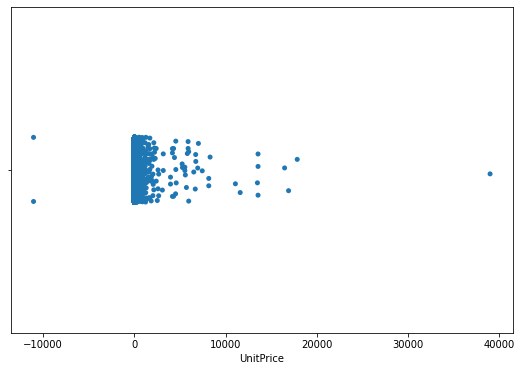

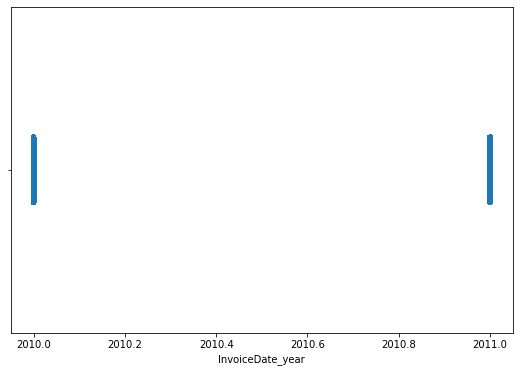

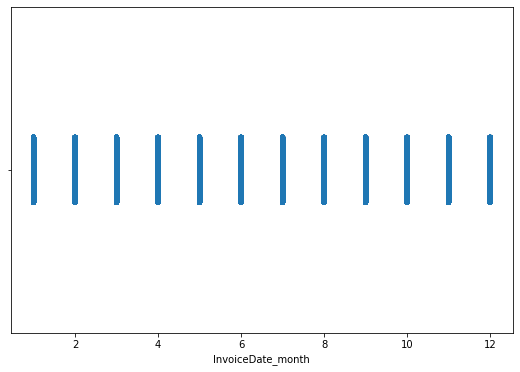

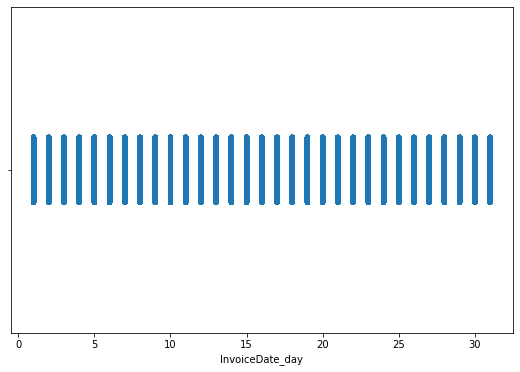

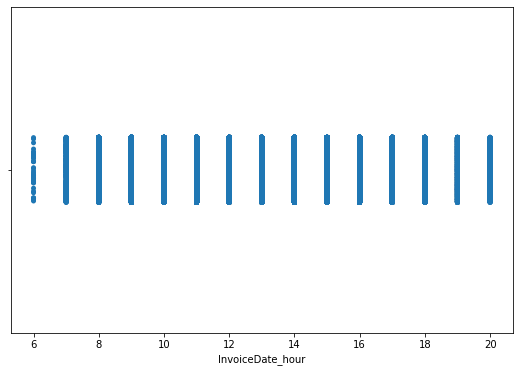

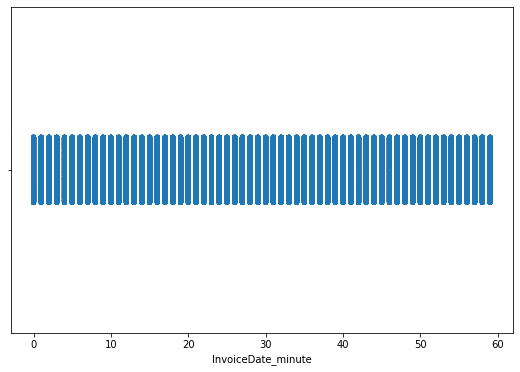

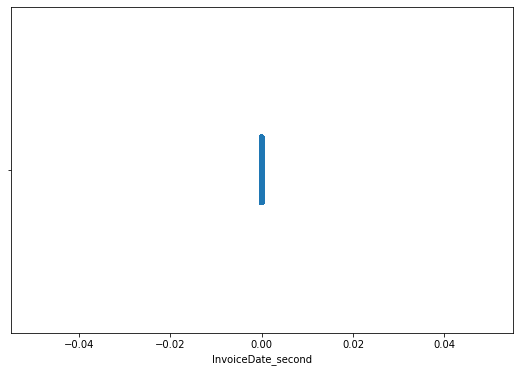

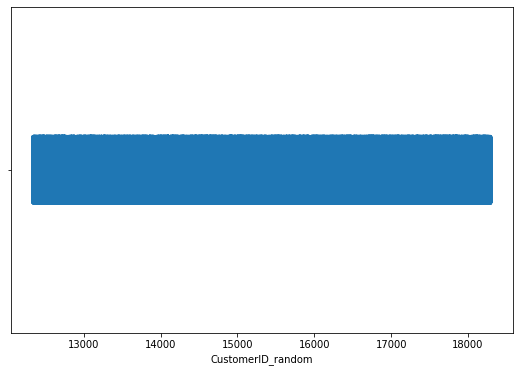

In [ ]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

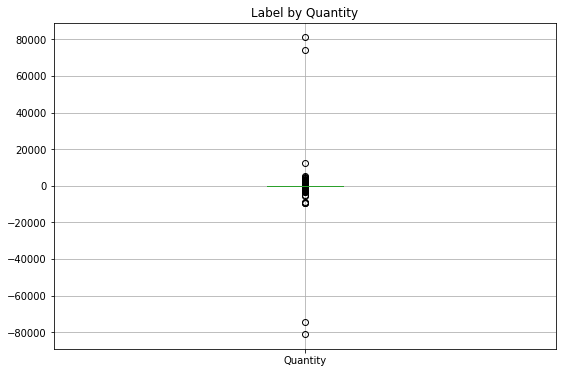

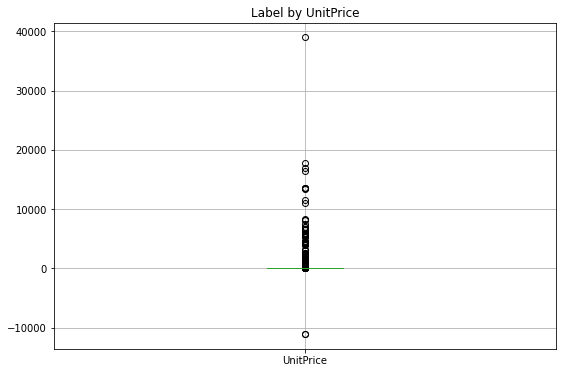

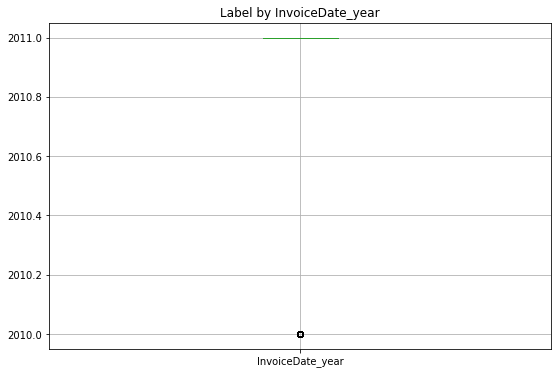

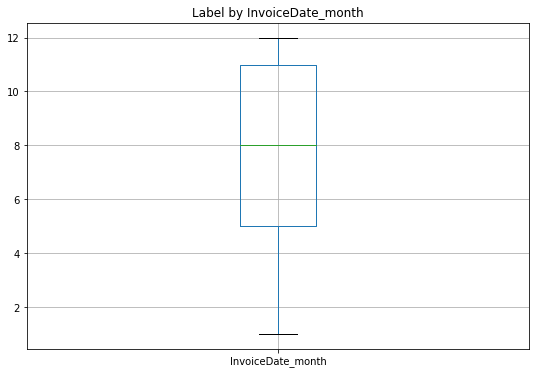

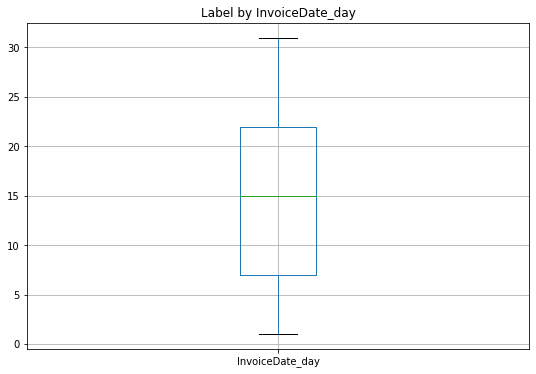

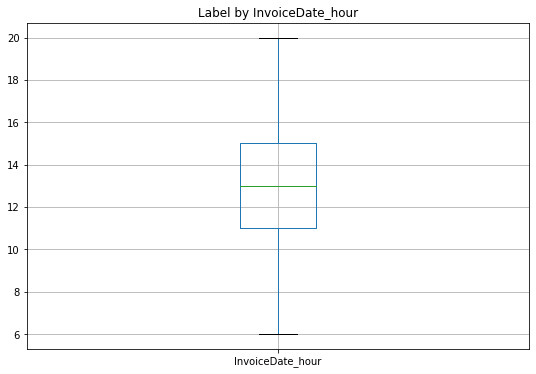

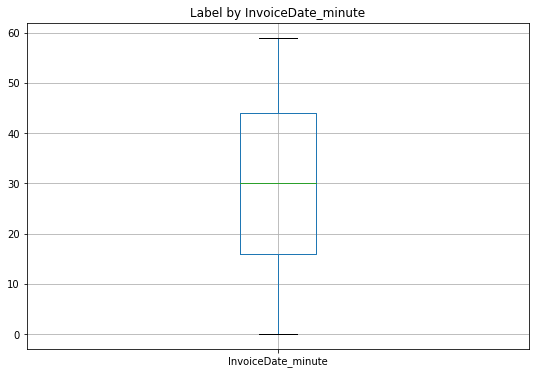

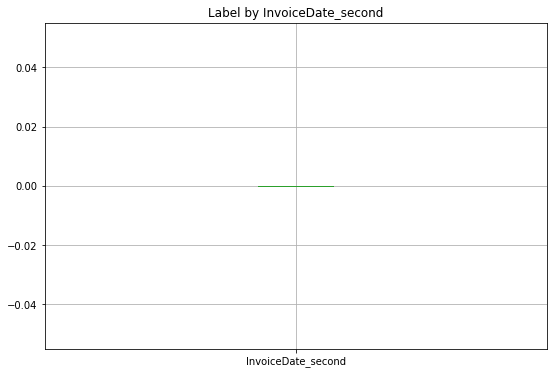

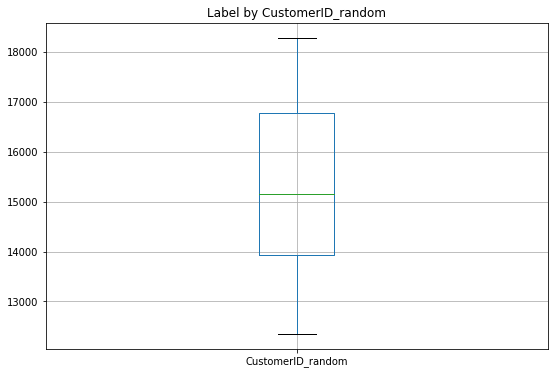

In [ ]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

In [ ]:
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

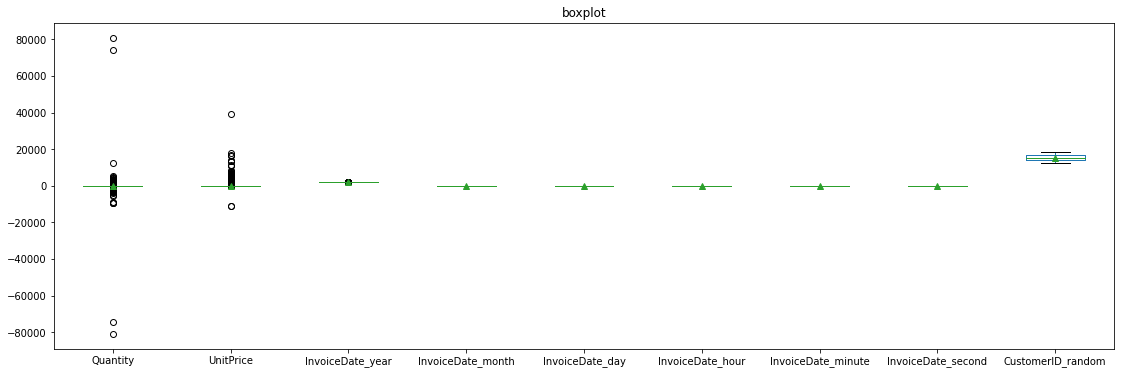

In [ ]:
plt.rcParams['figure.figsize']=(19,6)
ax = dataset[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

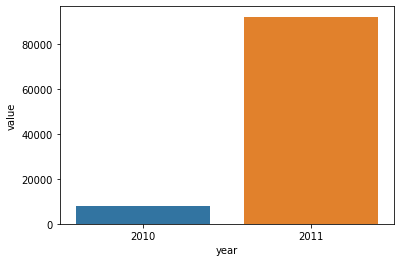

In [56]:
invb=pd.DataFrame({'year':[2011,2010],'value':[92011,7789]})
sns.barplot(y='value',x='year',data=invb)

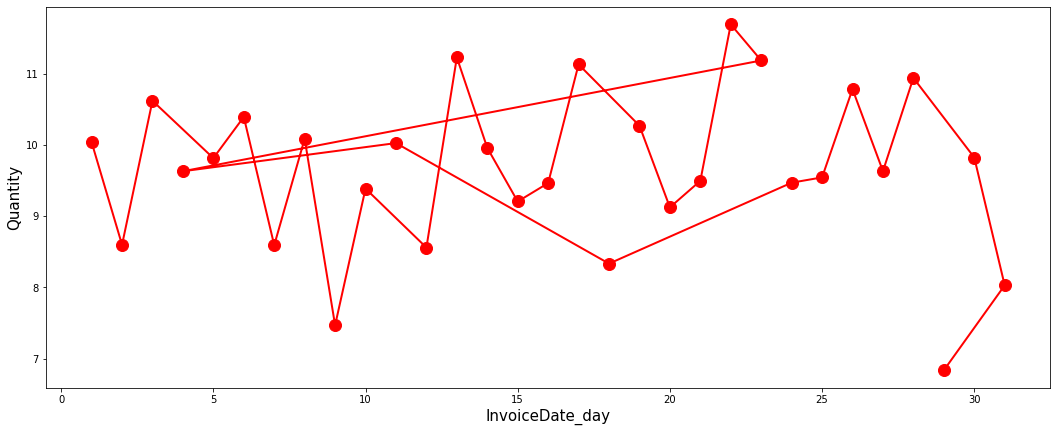

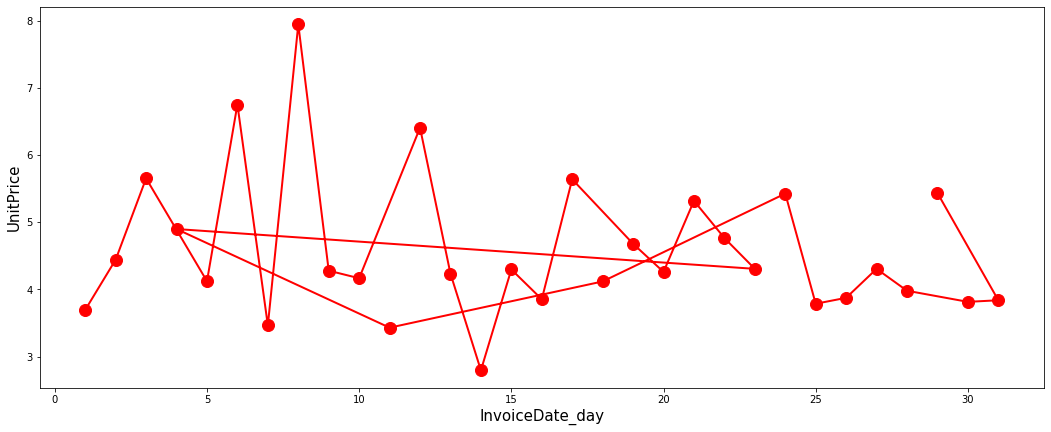

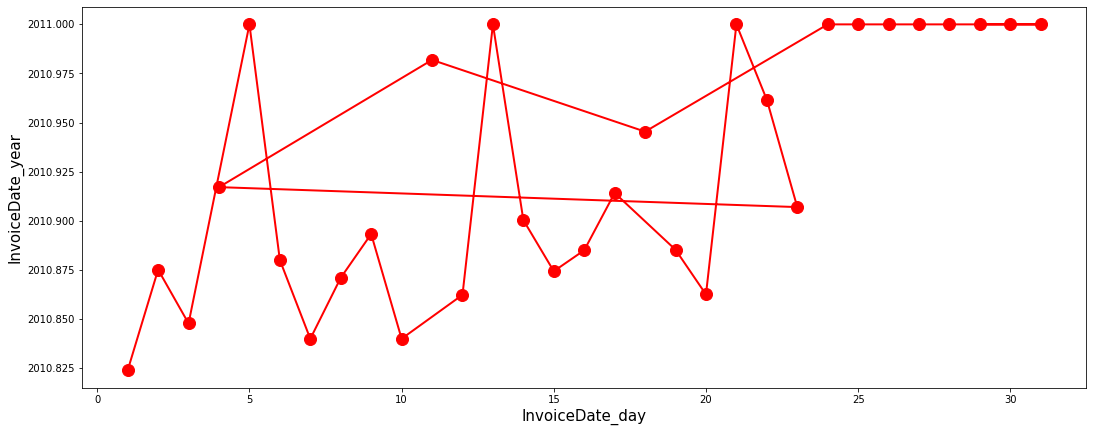

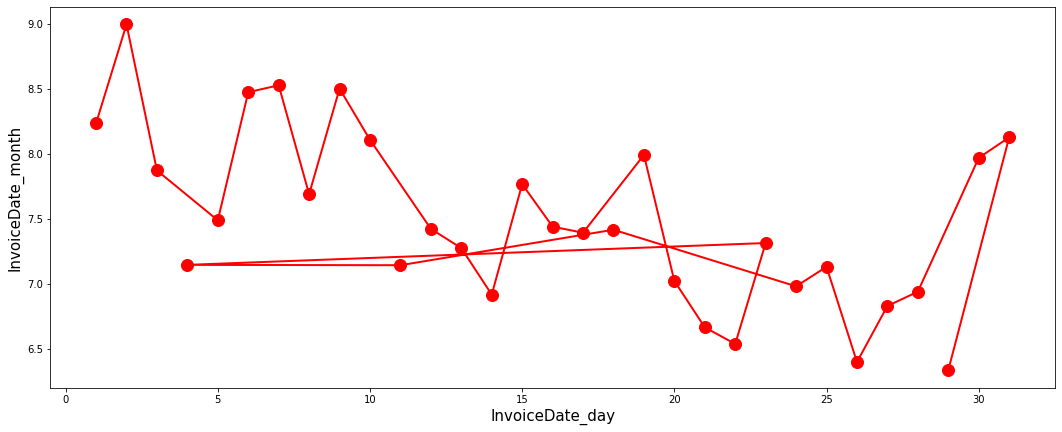

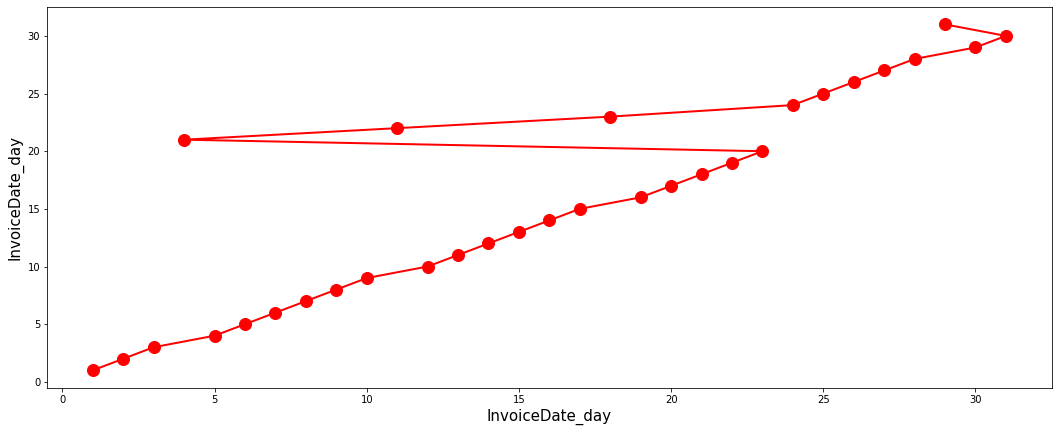

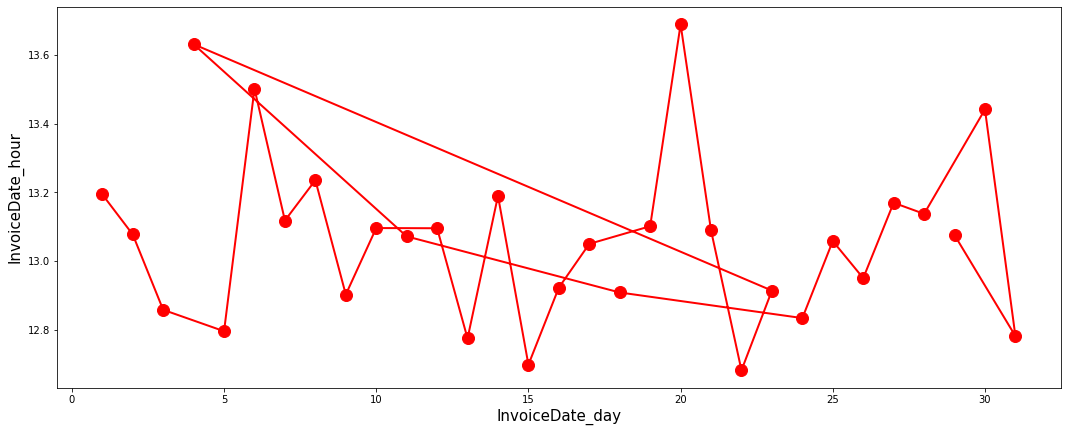

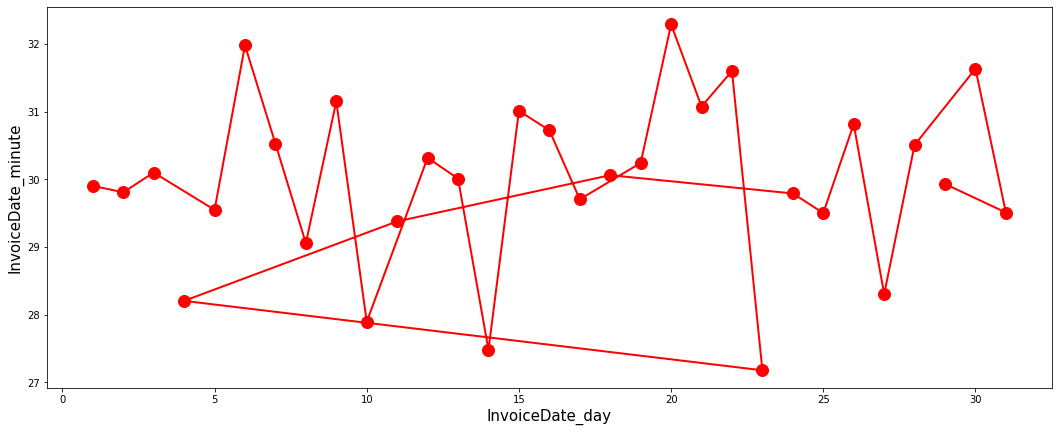

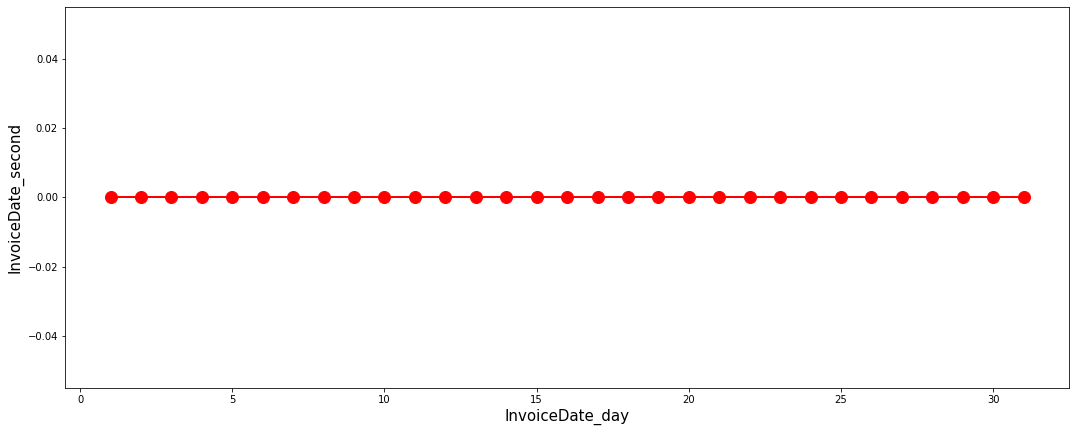

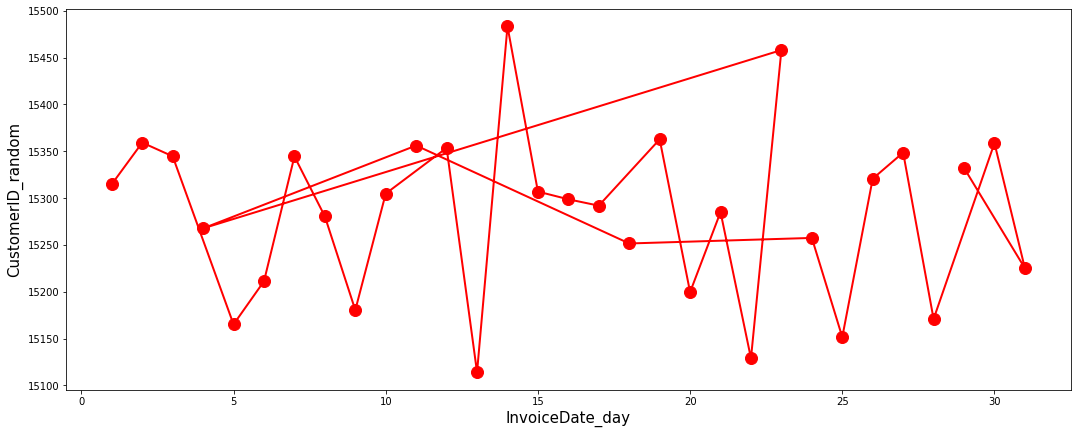

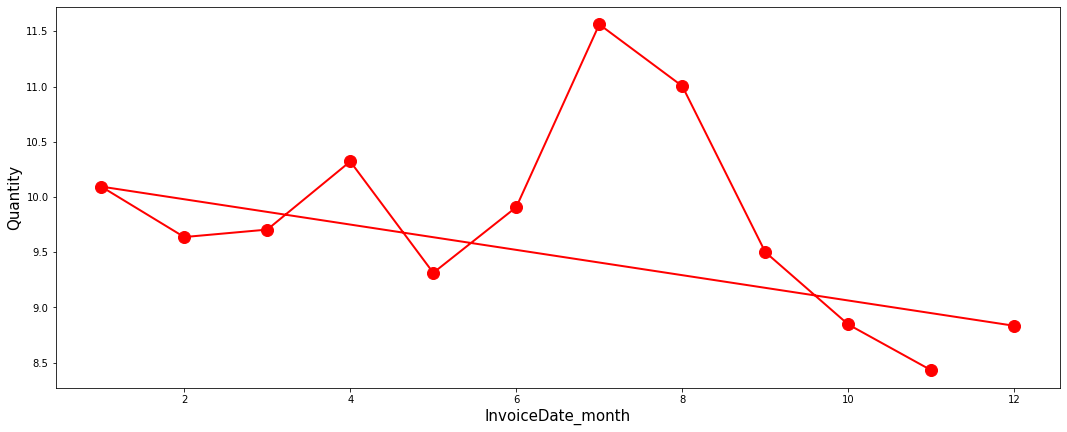

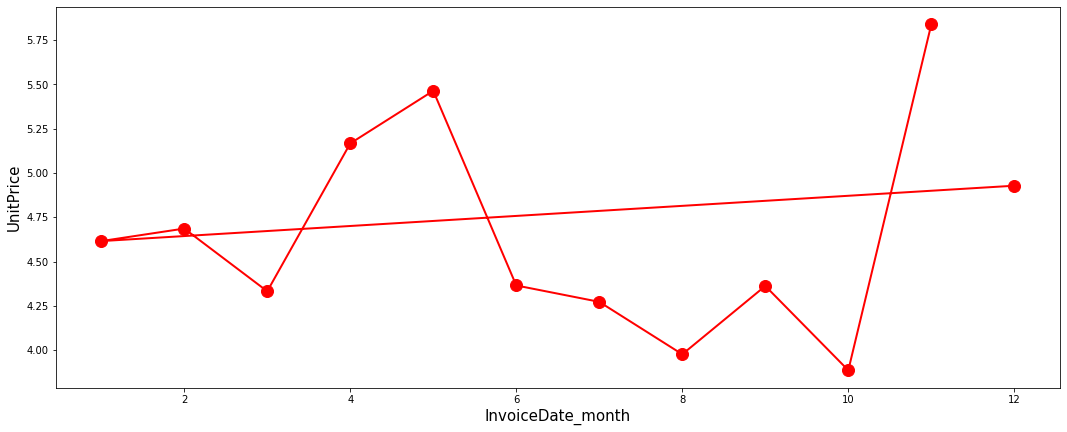

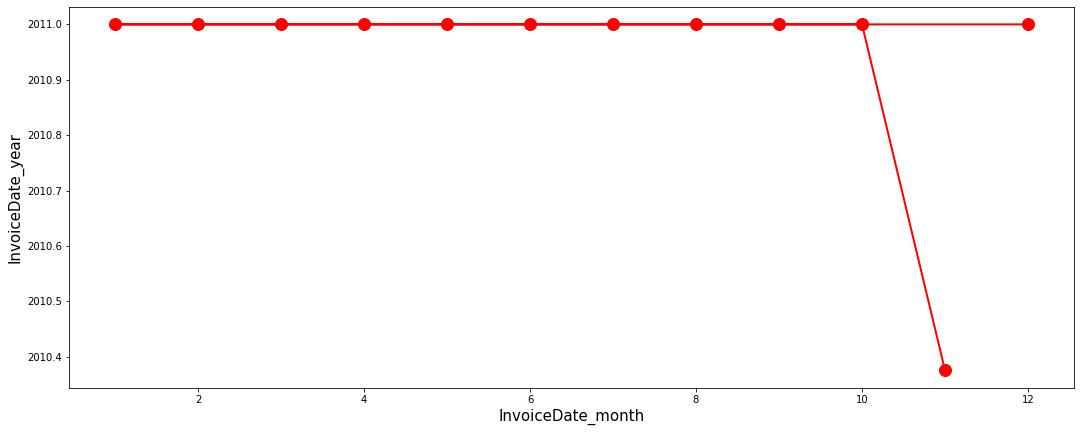

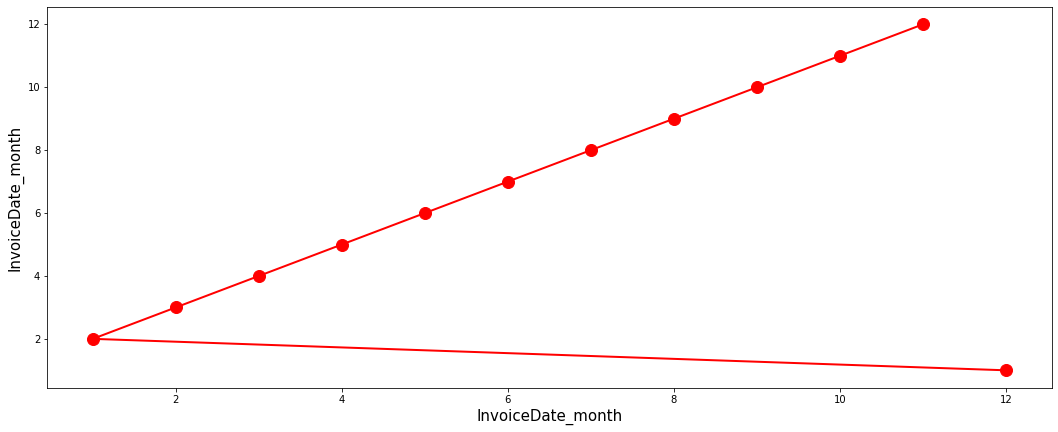

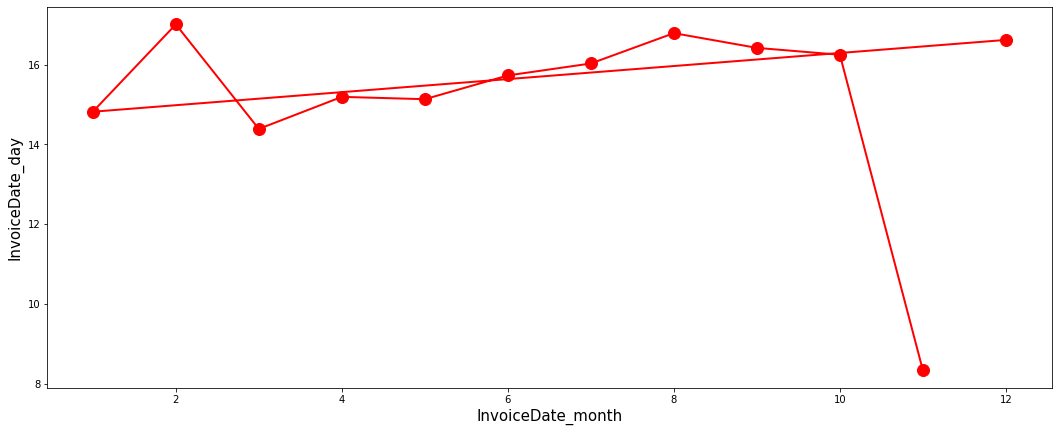

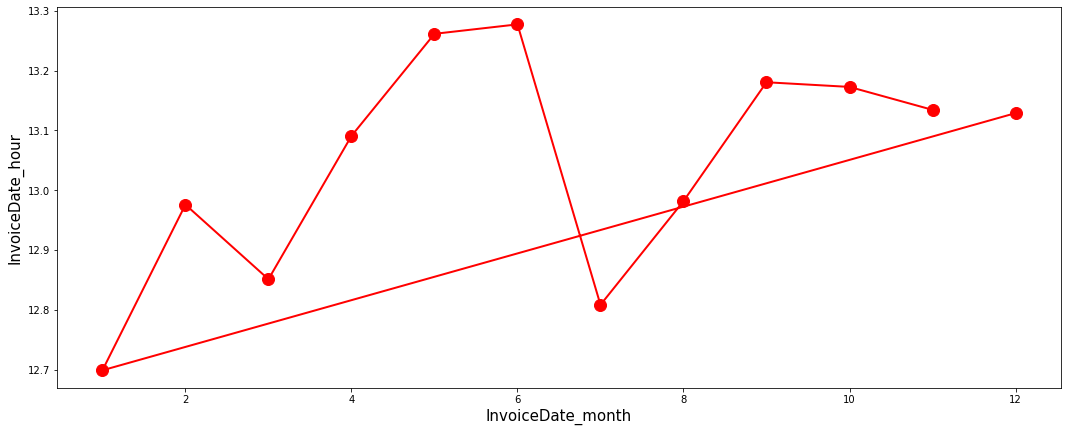

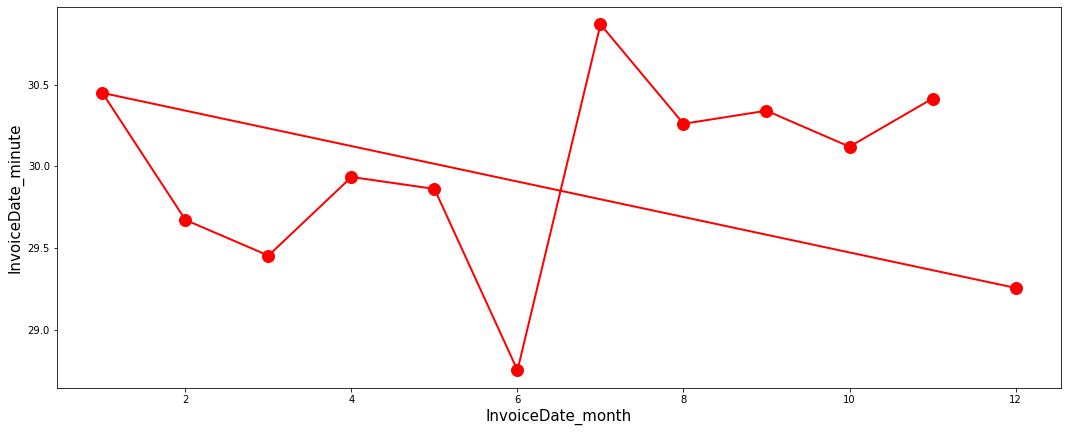

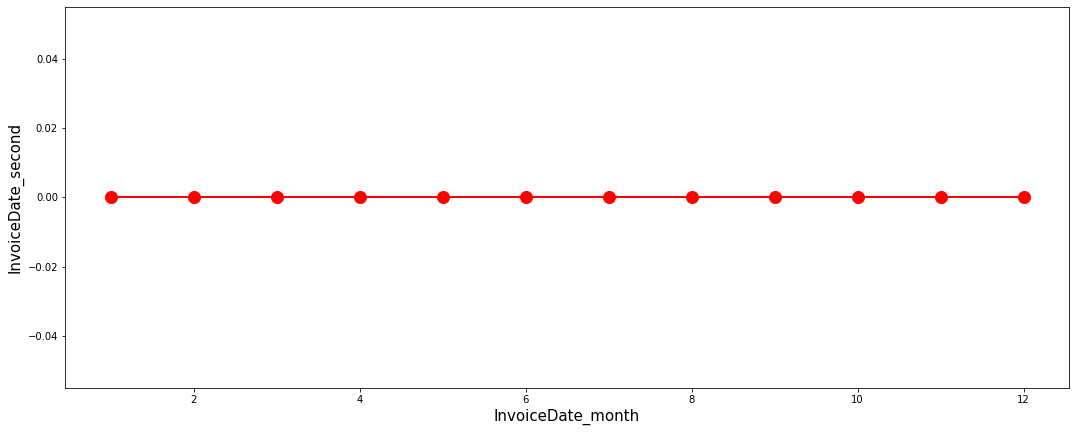

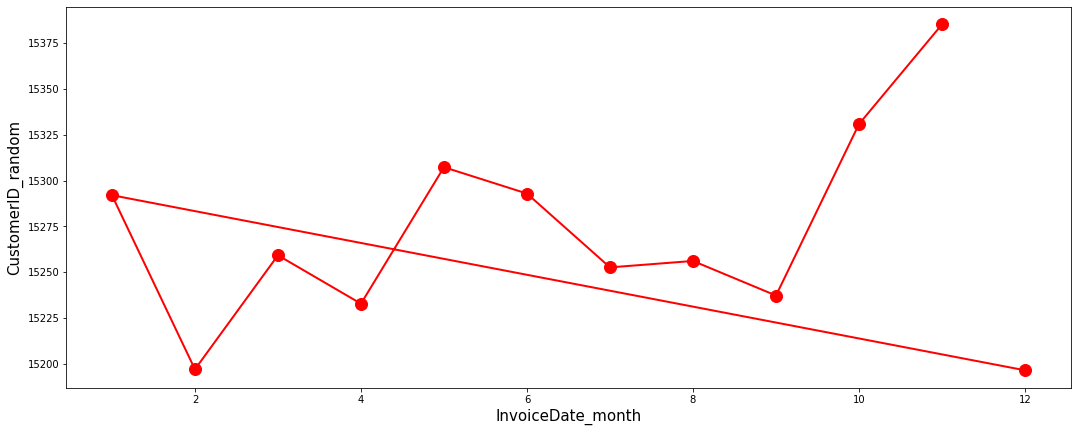

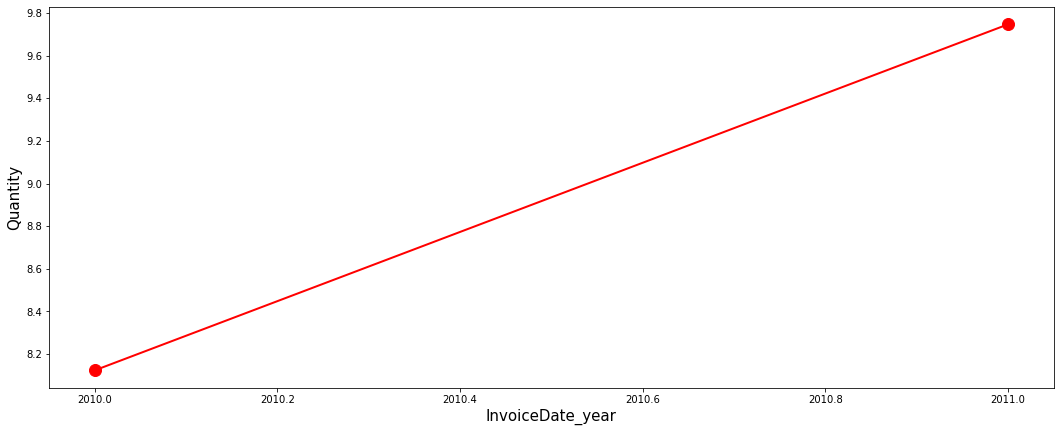

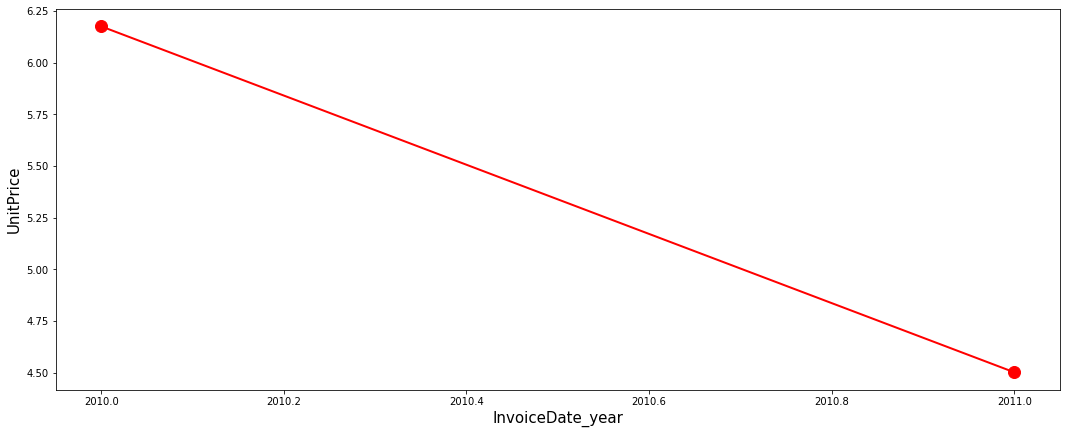

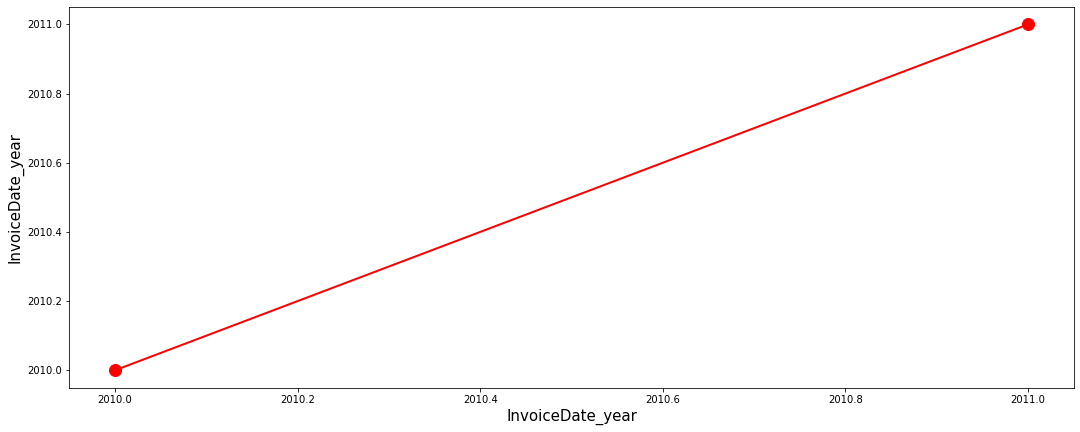

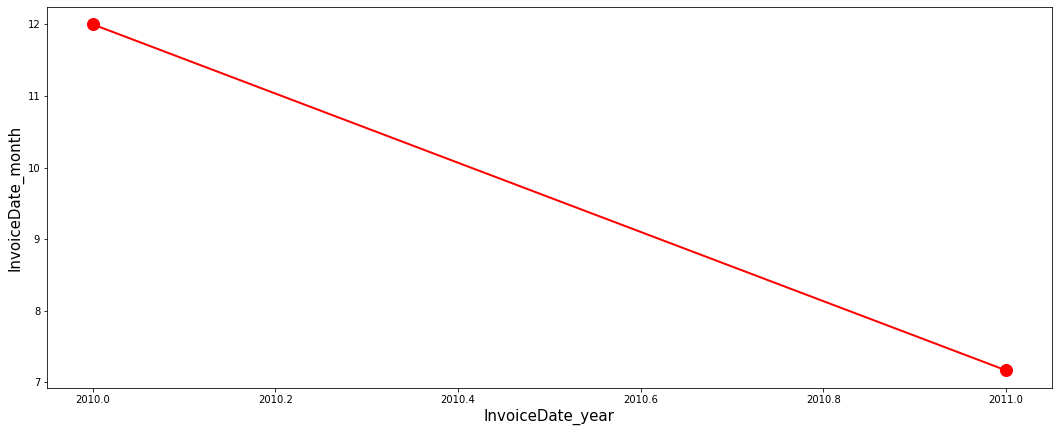

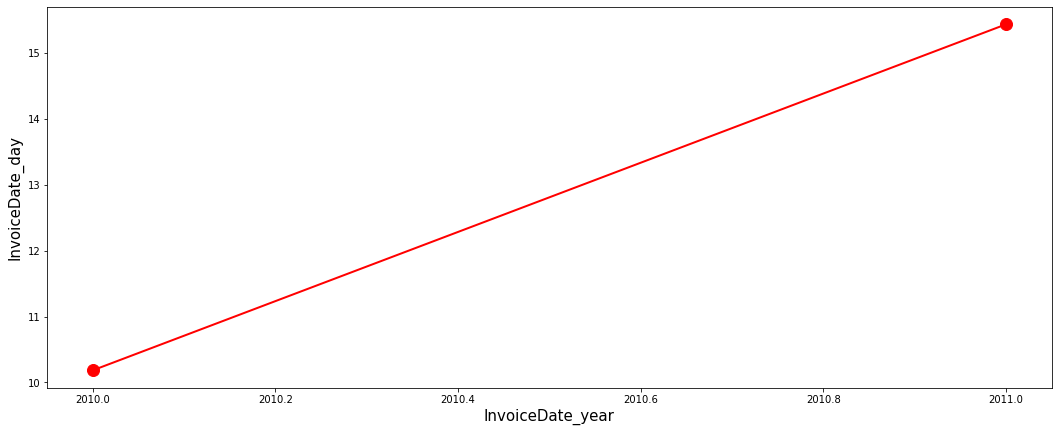

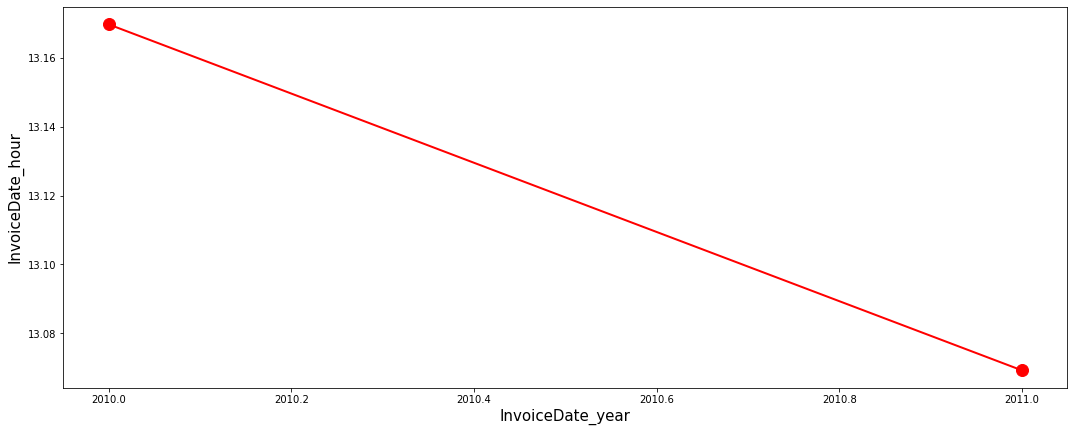

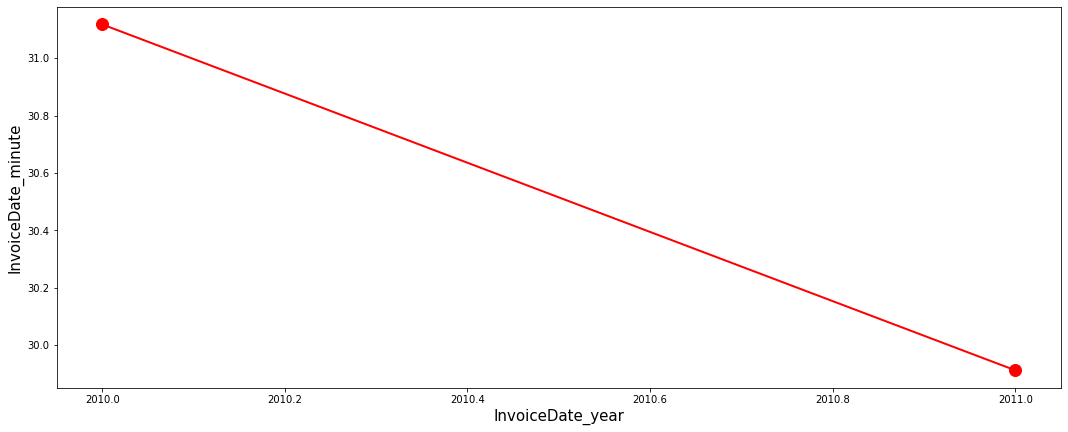

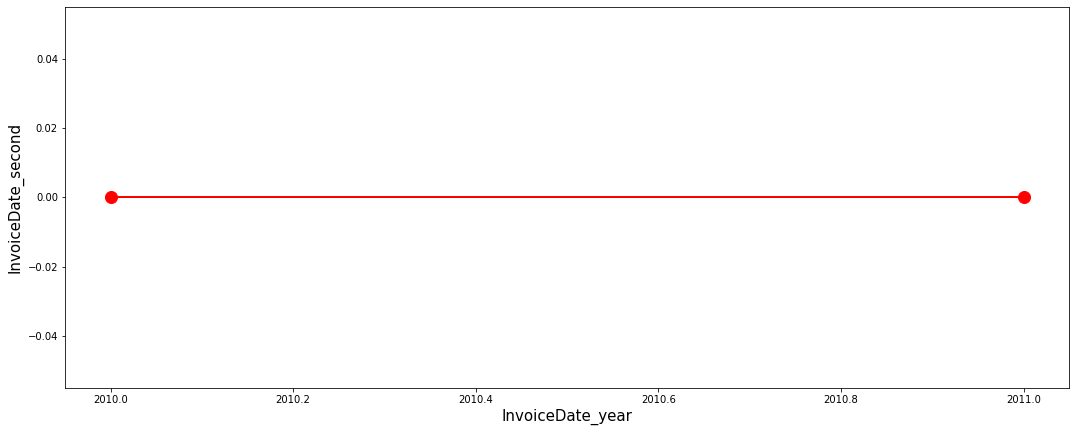

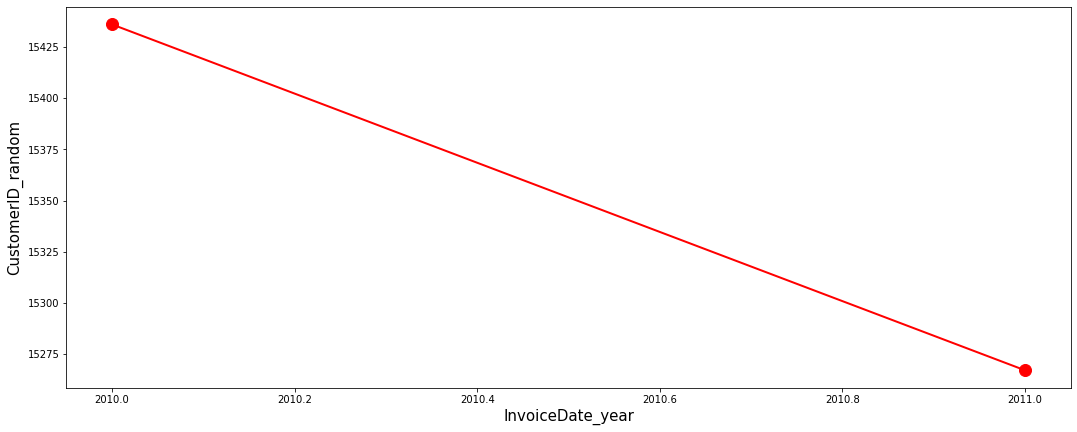

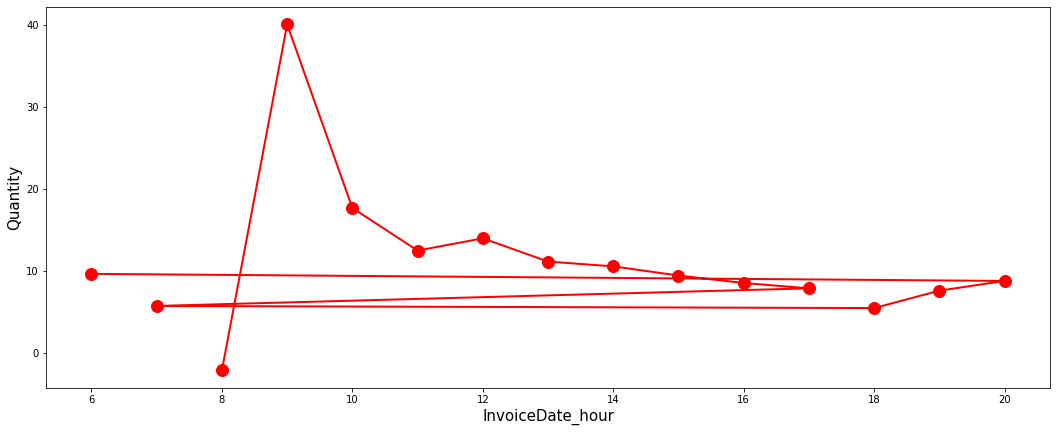

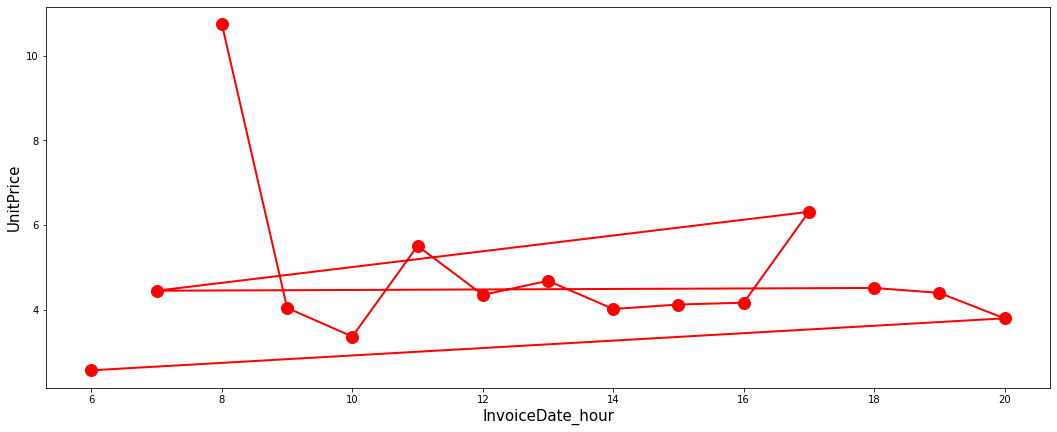

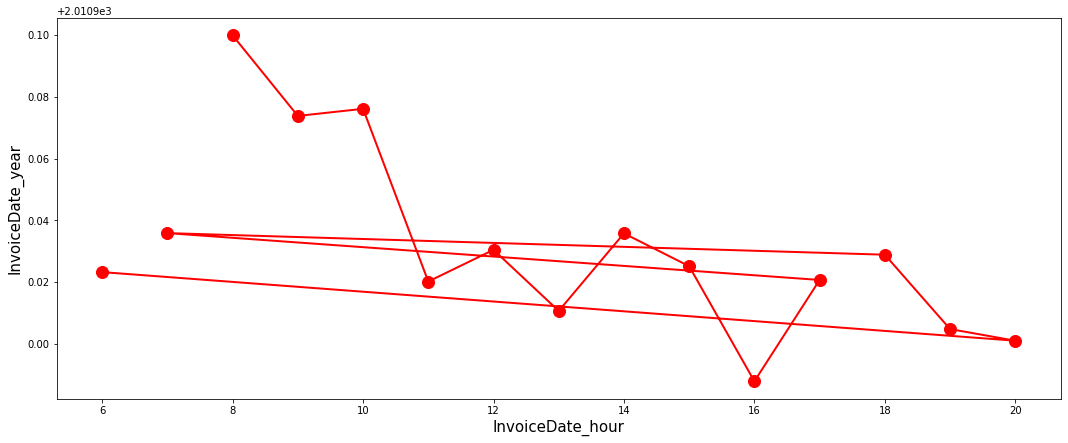

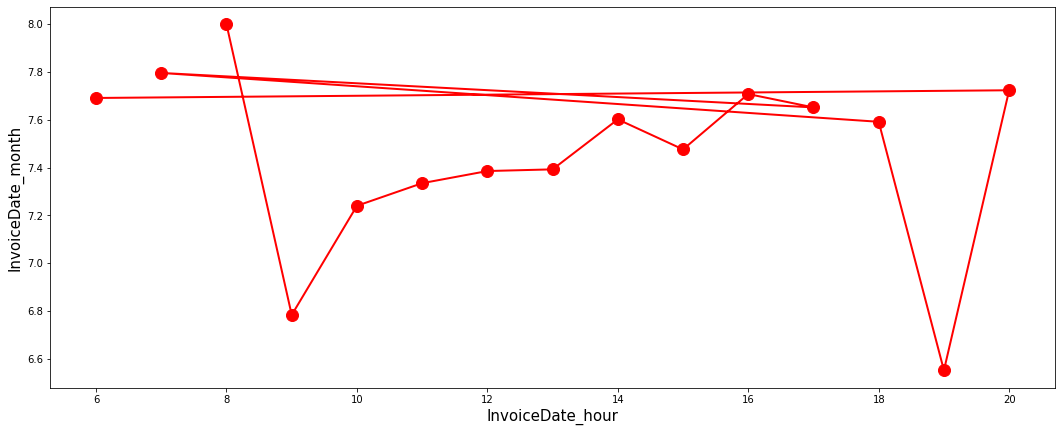

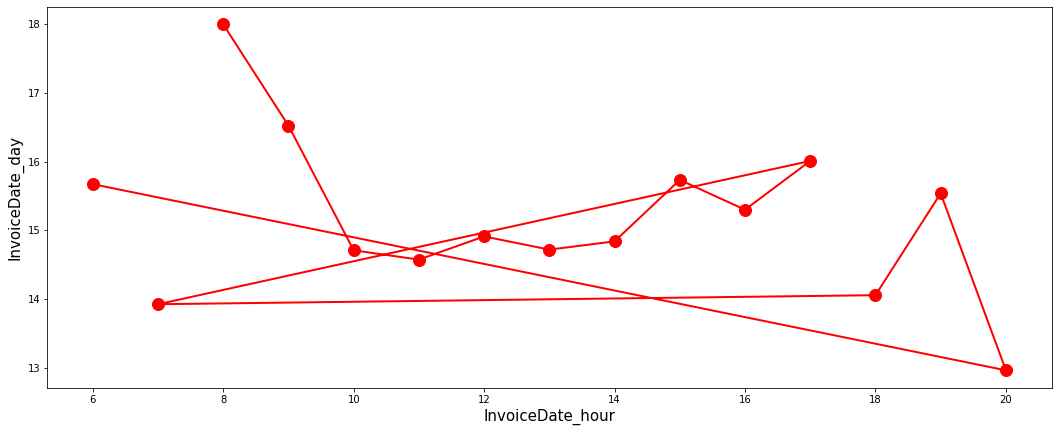

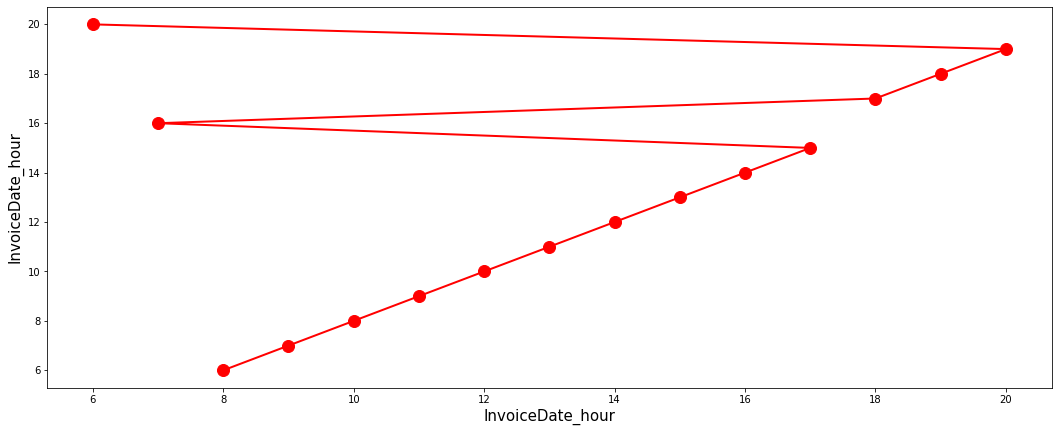

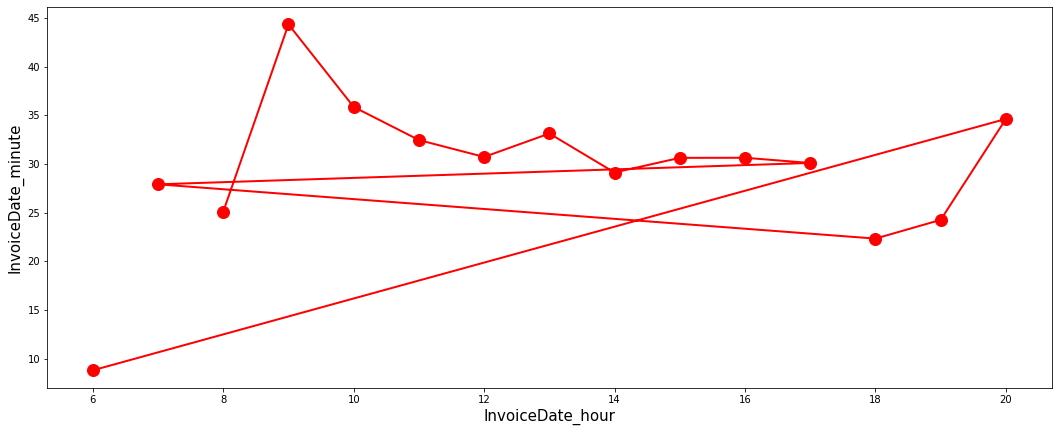

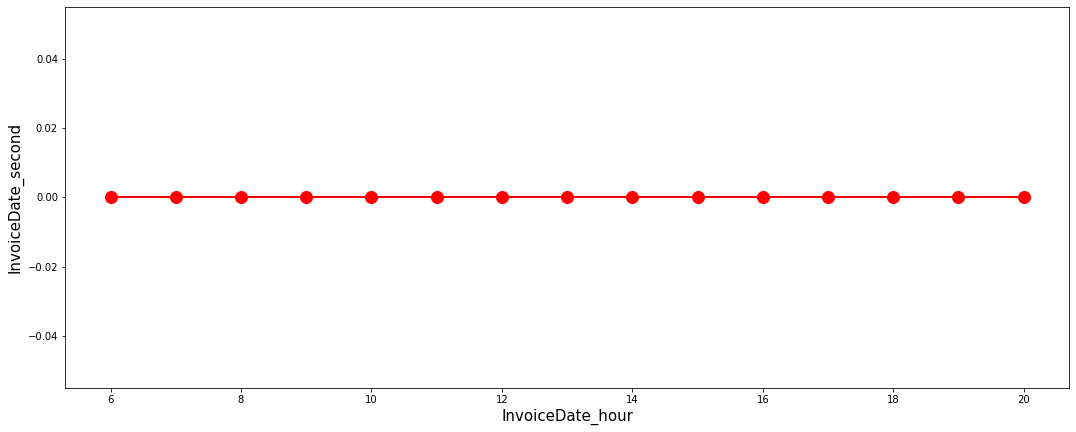

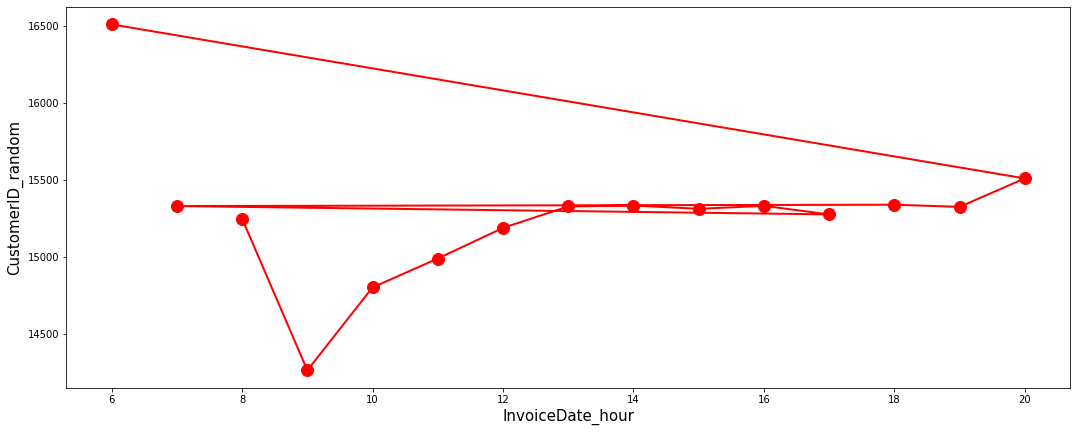

In [ ]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  for j in numerical_features:
    s1=dataset[i].unique()
    s2=dataset.groupby([i])[j].mean()

    plt.rcParams['figure.figsize'] = (18, 7)

    plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

  
    plt.xlabel(i, fontsize = 15)
    plt.ylabel(j, fontsize = 15)
    plt.show()

**Correlation**

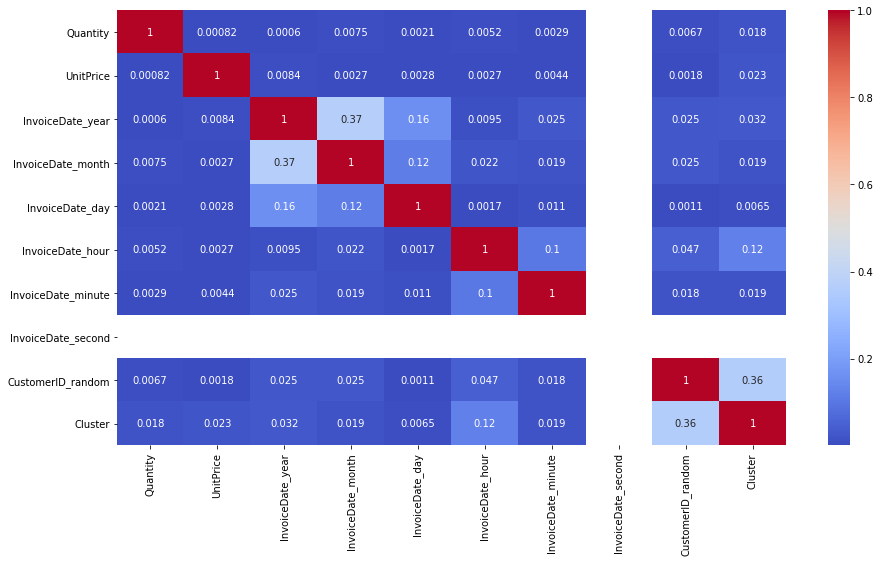

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

## **Handling Categorical Features**

In [ ]:
# Catagorical
dataset.head()

InvoiceNo StockCode  ... InvoiceDate_second  CustomerID_random
0    536365    85123A  ...                  0            17850.0
1    536365     71053  ...                  0            17850.0
2    536365    84406B  ...                  0            17850.0
3    536365    84029G  ...                  0            17850.0
4    536365    84029E  ...                  0            17850.0

[5 rows x 14 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           536641 non-null  object        
 1   StockCode           536641 non-null  object        
 2   Description         536641 non-null  object        
 3   Quantity            536641 non-null  int64         
 4   InvoiceDate         536641 non-null  datetime64[ns]
 5   UnitPrice           536641 non-null  float64       
 6   Country             536641 non-null  object        
 7   InvoiceDate_year    536641 non-null  int64         
 8   InvoiceDate_month   536641 non-null  int64         
 9   InvoiceDate_day     536641 non-null  int64         
 10  InvoiceDate_hour    536641 non-null  int64         
 11  InvoiceDate_minute  536641 non-null  int64         
 12  InvoiceDate_second  536641 non-null  int64         
 13  CustomerID_random   536641 no

**Univariate Analysis**

In [ ]:
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

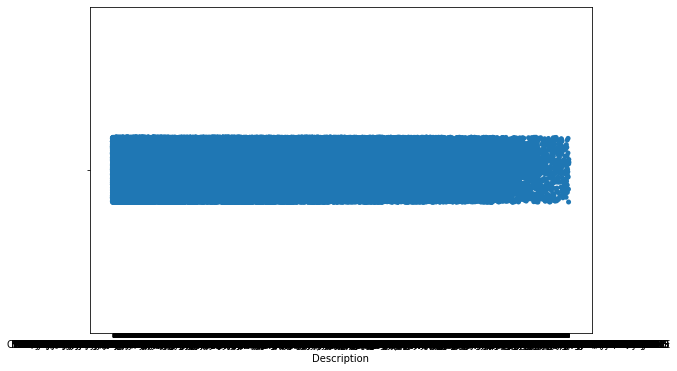

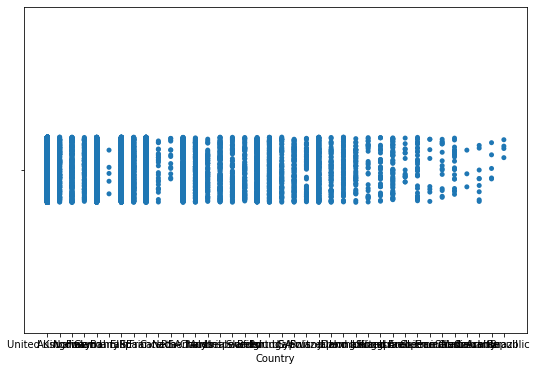

In [ ]:
for col in [  'Description', 'Country']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

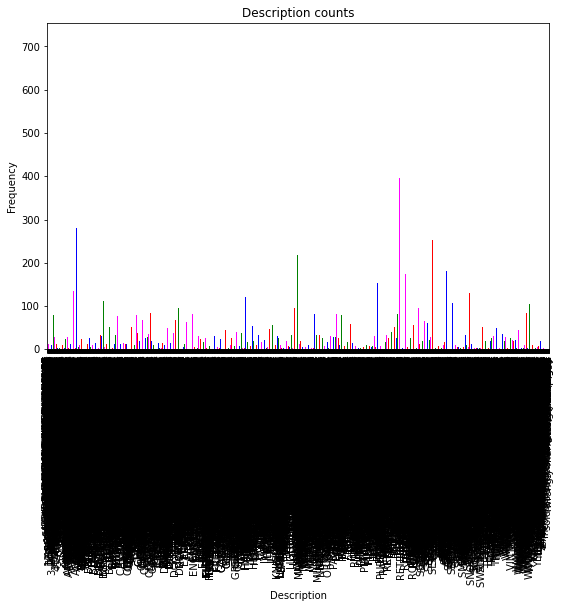

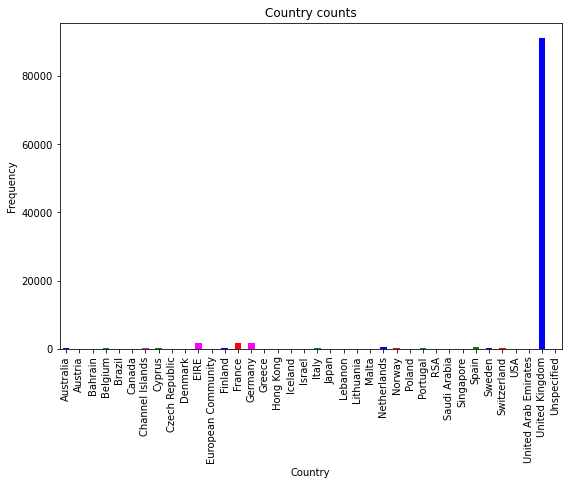

In [ ]:
# plot a bar plot for each categorical feature count 

for col in  [  'Description', 'Country']:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['blue','red','magenta','g'])
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

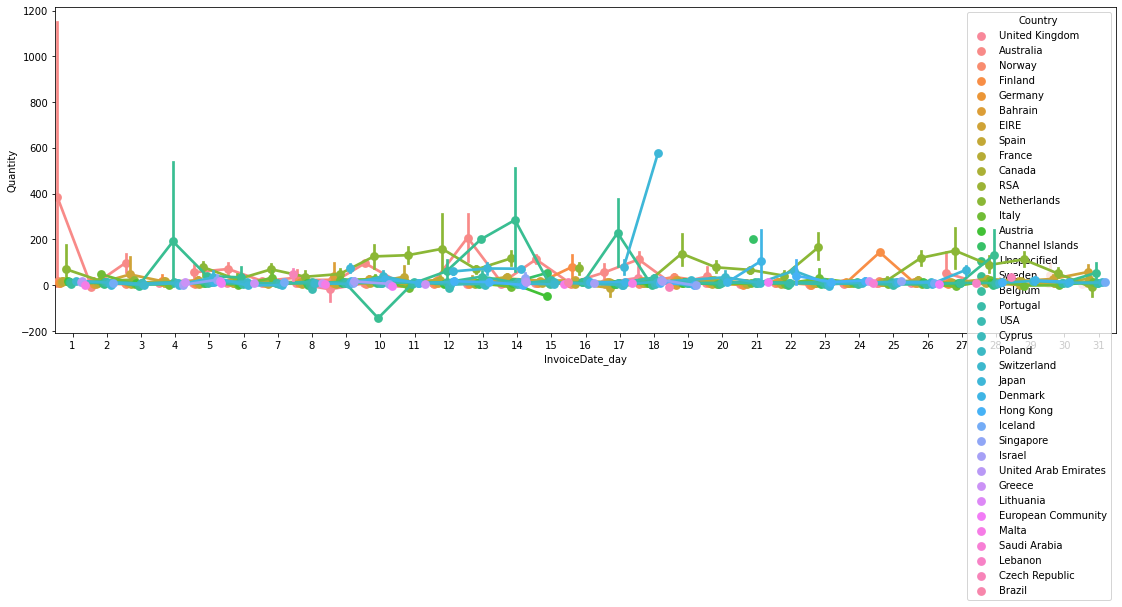

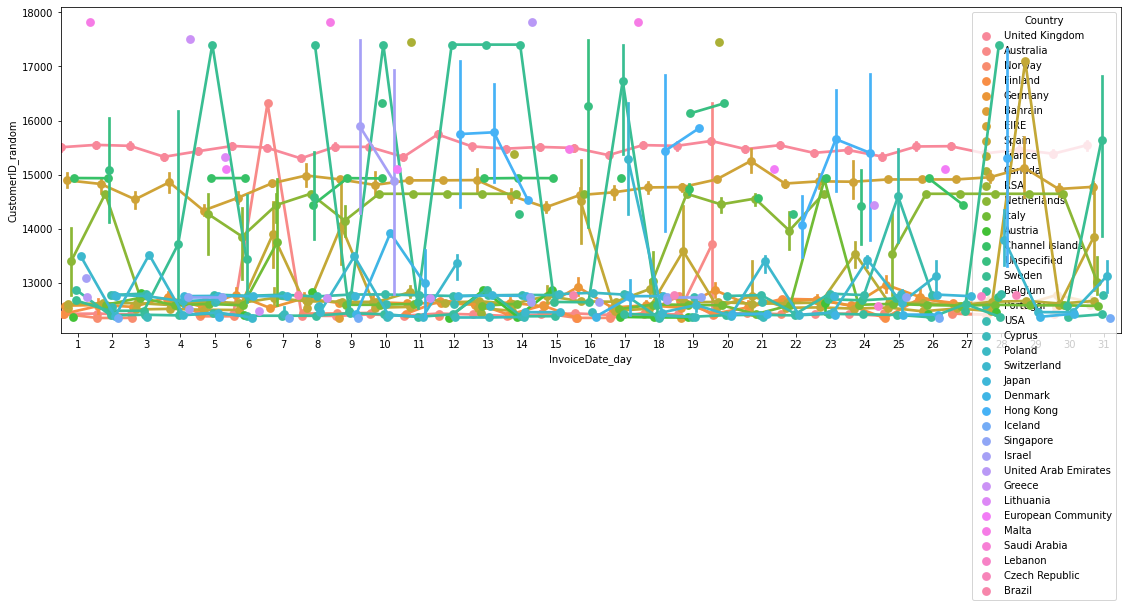

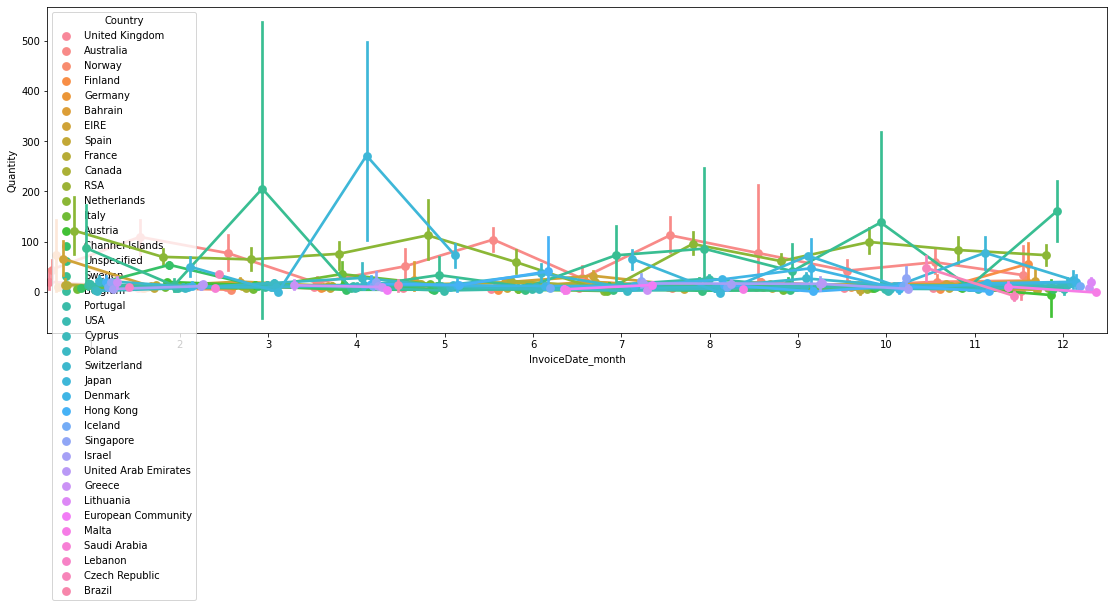

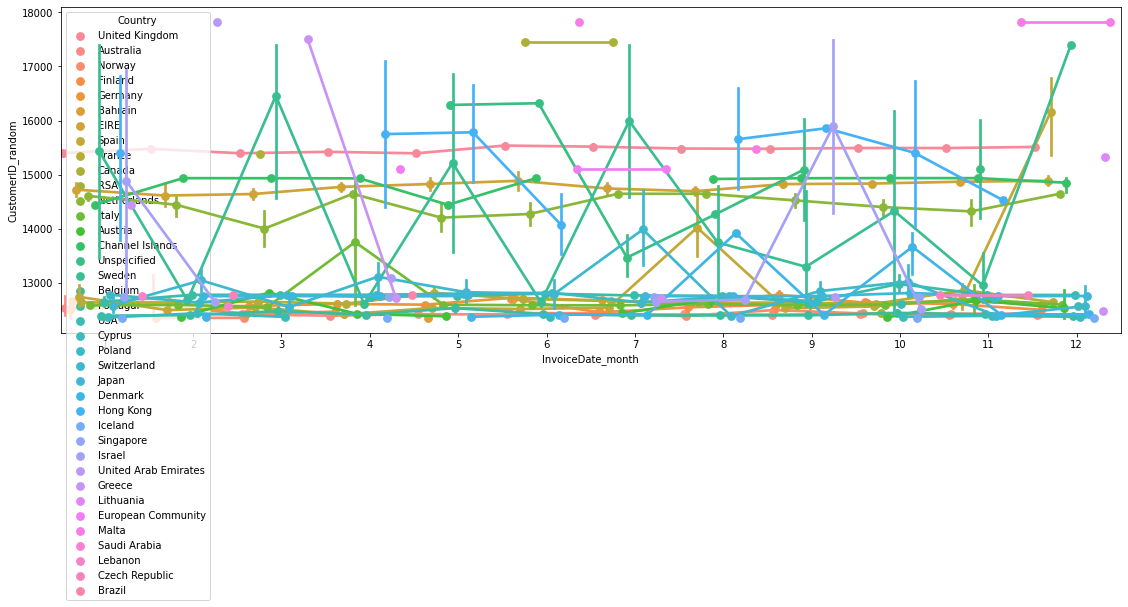

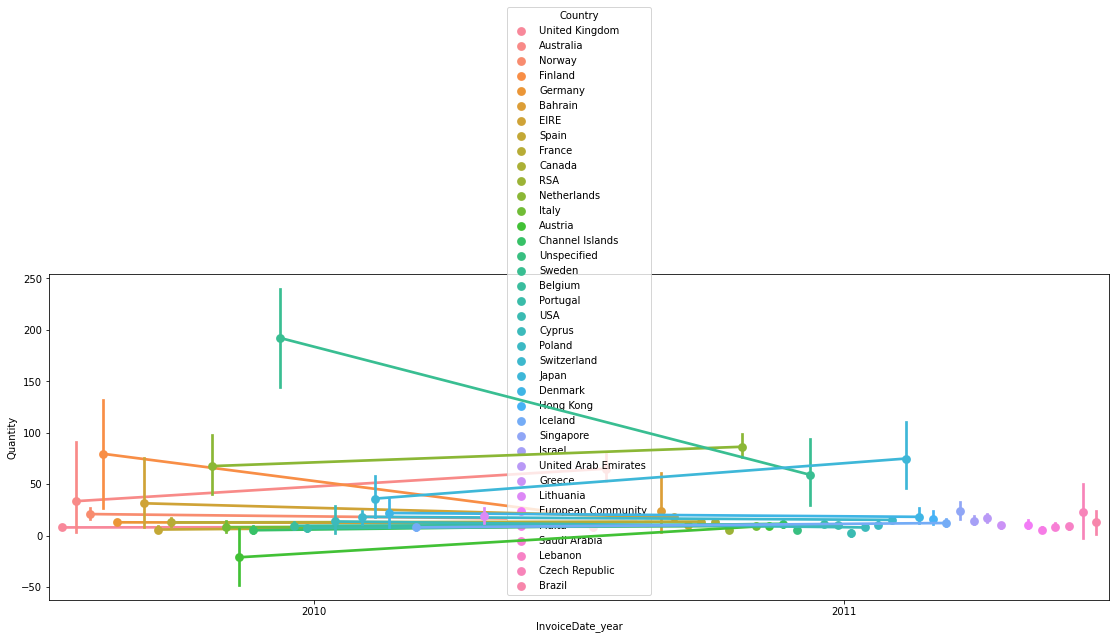

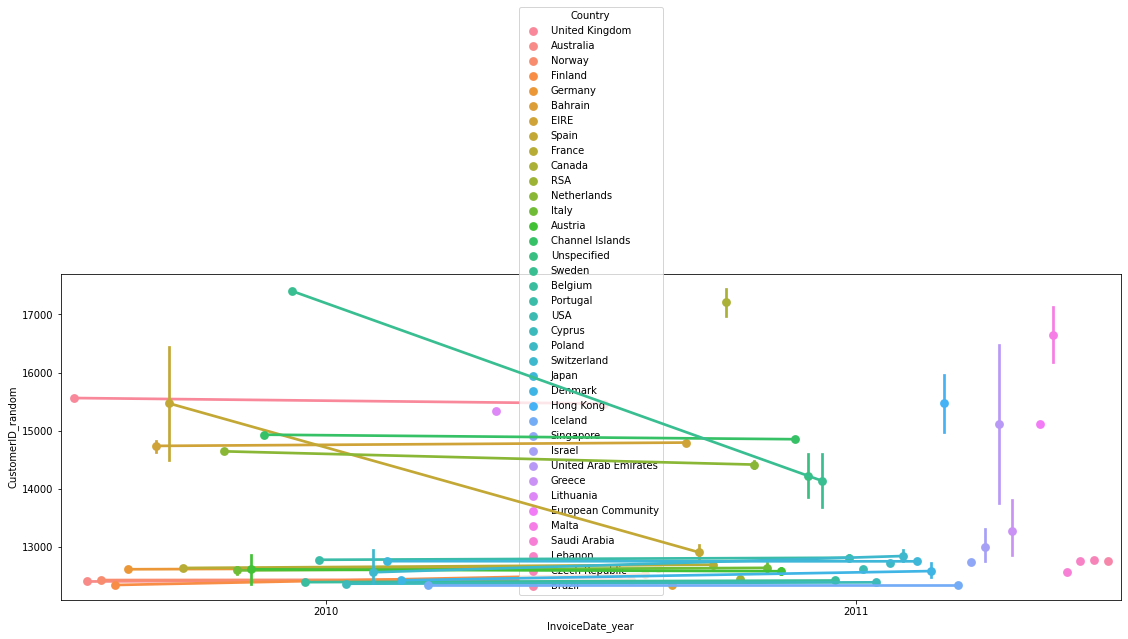

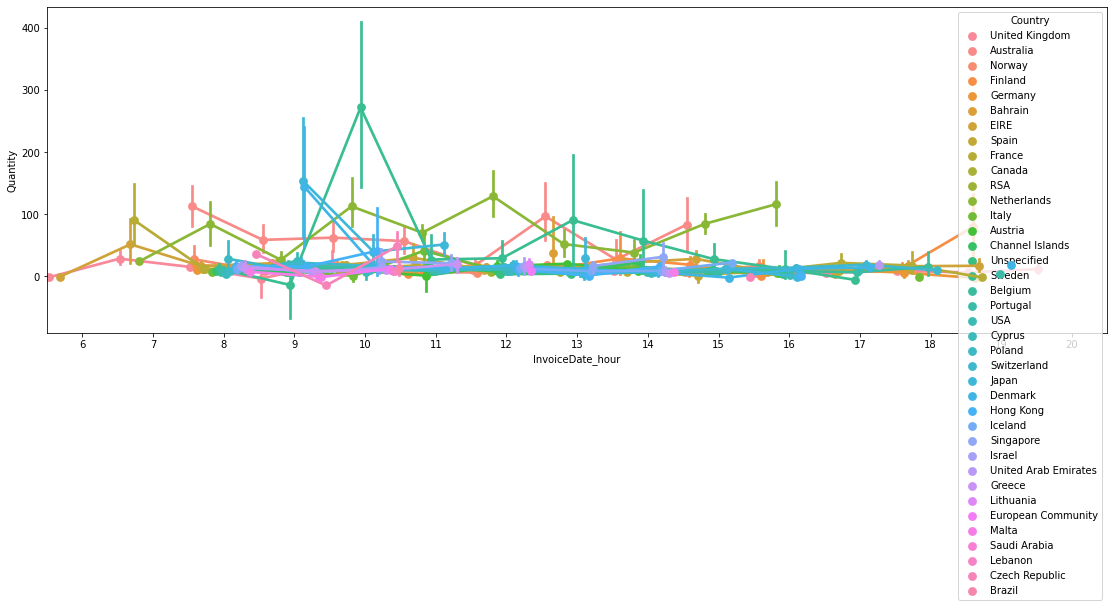

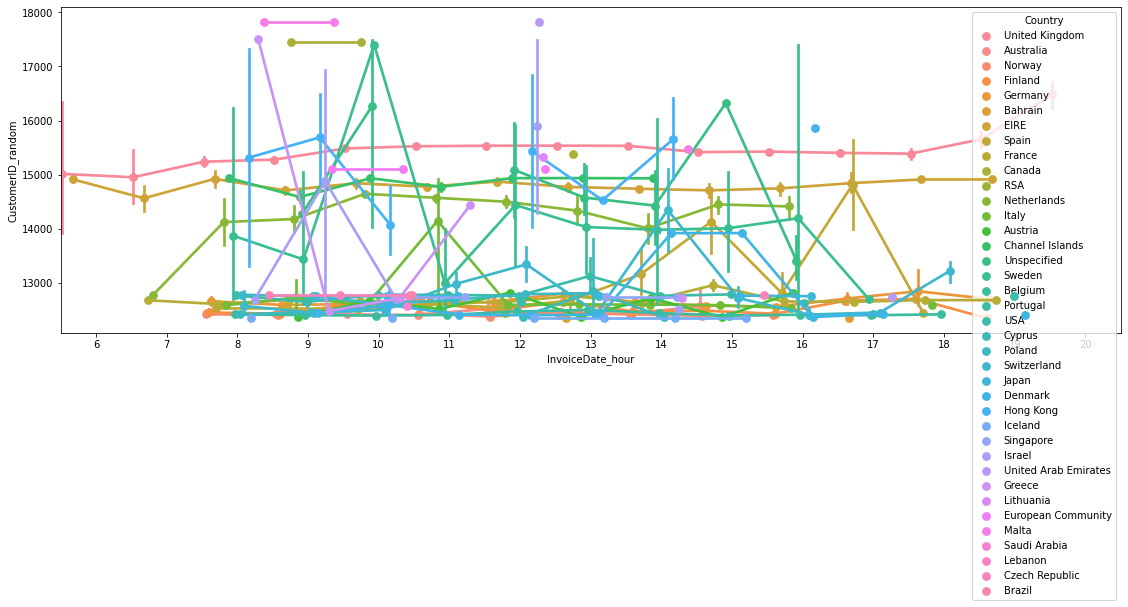

In [ ]:
for i in ['InvoiceDate_day','InvoiceDate_month','InvoiceDate_year','InvoiceDate_hour']:
  ax = sns.pointplot(x=i, y="Quantity", hue="Country",
                   data=dataset, dodge=True)
  plt.show()
  

  ax = sns.pointplot(x=i, y="CustomerID_random", hue="Country",
                   data=dataset, dodge=True)
  plt.show()
  

  



# **RFM Table**



R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [34]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date
# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]
# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)
# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'}).reset_index()
# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [35]:
customers.head(10)

CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      326          1       77183.60
1     12347.0        3         27         588.48
2     12348.0      319          5         443.52
3     12349.0       19         15         578.21
4     12350.0      311          2          42.90
5     12352.0       37         19         506.68
6     12353.0      205          2          59.70
7     12354.0      233          6          94.45
8     12355.0      215          3         165.30
9     12356.0      246          7         427.40

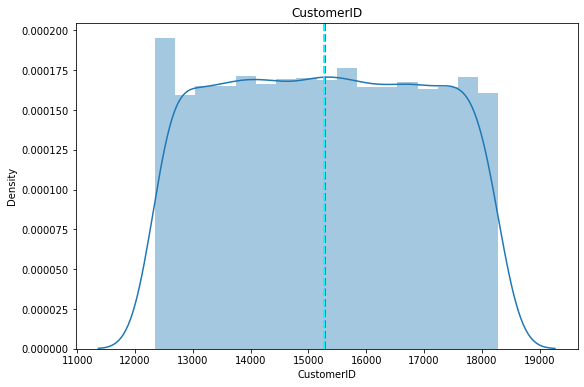

Skewness : 0.0076522952748913275
Kurtosis : -1.193708598479697


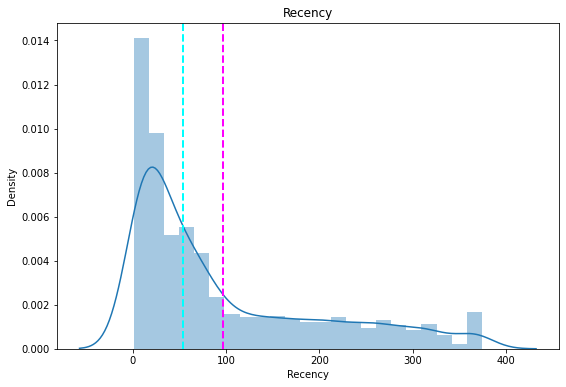

Skewness : 1.1894093874114786
Kurtosis : 0.2604433473318766


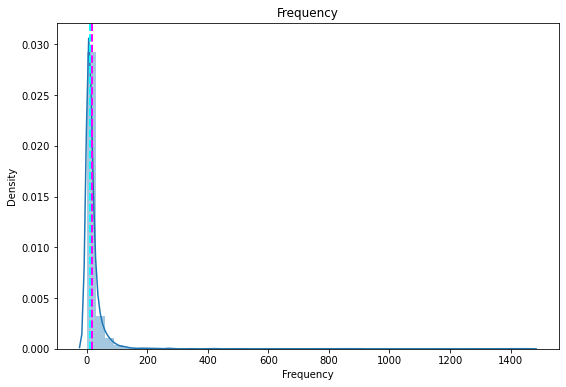

Skewness : 17.707469730773248
Kurtosis : 455.77098759018554


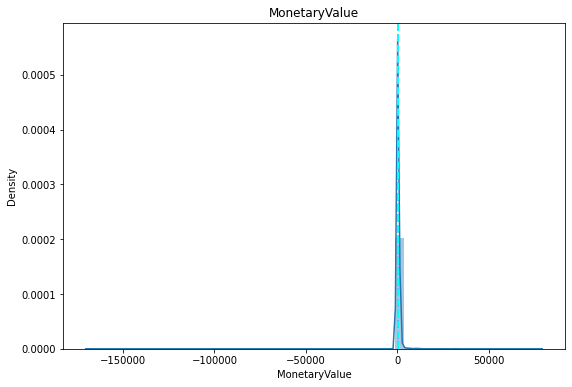

Skewness : -25.90170467892271
Kurtosis : 1691.90419354206


In [36]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customers[col])
  sns.distplot(customers[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customers[col].skew())
  print( "Kurtosis :",customers[col].kurt())

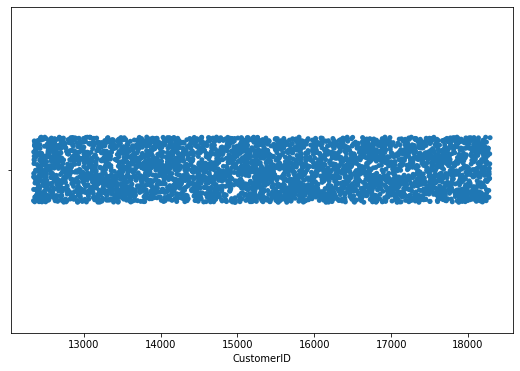

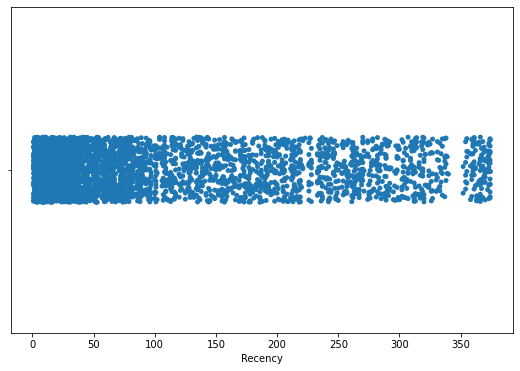

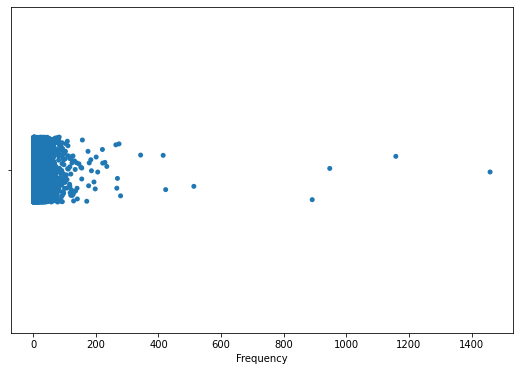

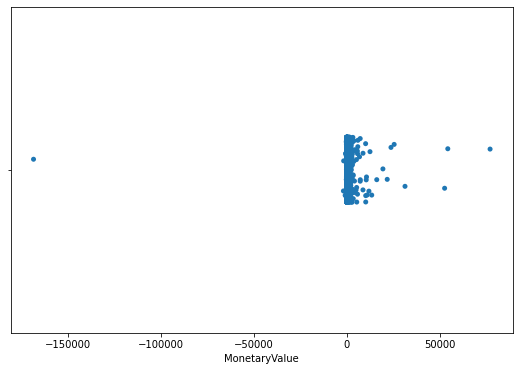

In [37]:
for col in ["CustomerID","Recency","Frequency","MonetaryValue"]:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(customers[col])

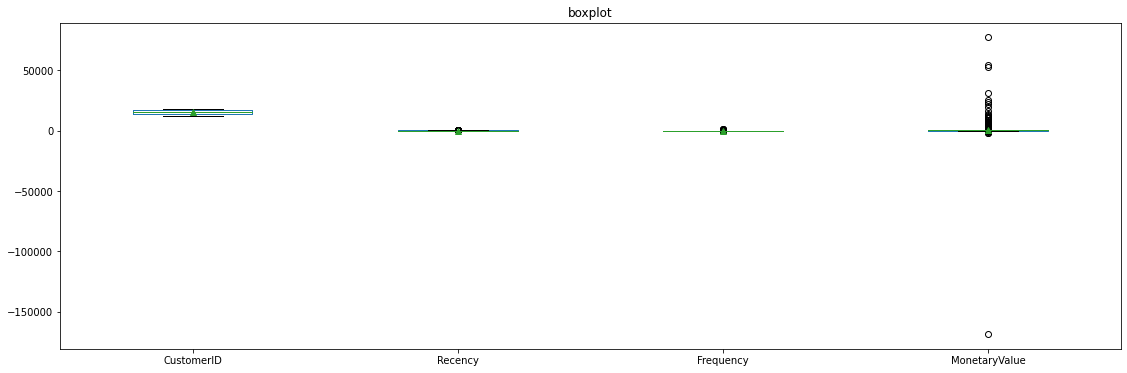

In [38]:
plt.rcParams['figure.figsize']=(19,6)
ax = customers[["CustomerID","Recency","Frequency","MonetaryValue"]].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

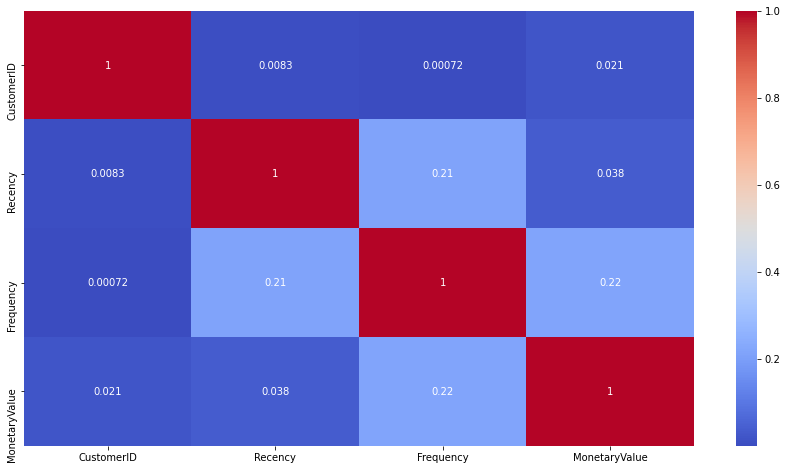

In [39]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customers.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Outlier Treatment**


In [40]:
dataset_l=dataset.copy()

## **For Quite Symmetric Features**

In [41]:
dataset_l.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

In [42]:
def iqr_symmetric(df,variable):
  
  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  print(variable.upper())
  print(" ")
  print(f"lower_bridge_{variable}",lower_bridge)
  print(" ")
  print(f"upper_bridge_{variable}",upper_bridge)
  print(" ")

In [43]:
for variable in ['Quantity',
       'UnitPrice']:
  iqr_symmetric(dataset_l,variable)

QUANTITY
 
lower_bridge_Quantity -1047.344274005122
 
upper_bridge_Quantity 1066.198382221555
 
UNITPRICE
 
lower_bridge_UnitPrice -255.49434246773973
 
upper_bridge_UnitPrice 264.4301140308692
 


In [44]:
def iqr_symmetric_impute(df,variable):
  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [45]:
for variable in ['Quantity',
       'UnitPrice']:
  iqr_symmetric_impute(dataset_l,variable)

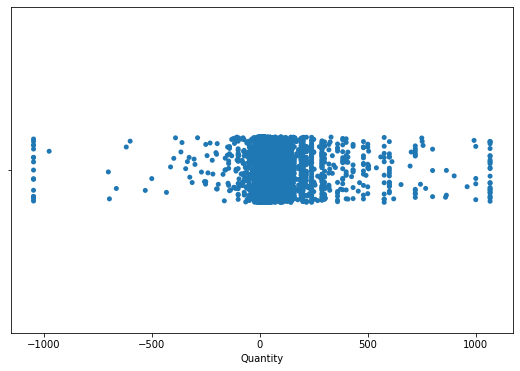

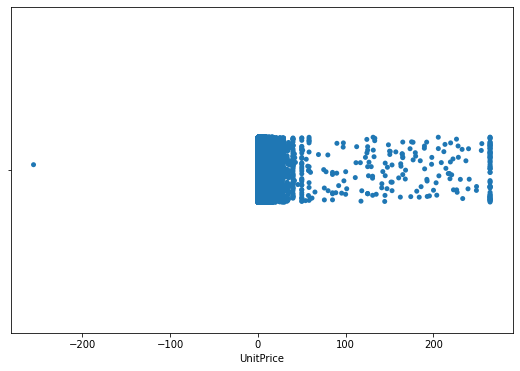

In [46]:
for col in ['Quantity',
       'UnitPrice']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset_l[col])

# **Categorical Value Encoding**

**One Hot Encoding**

In [47]:
dataset_l.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random'],
      dtype='object')

In [48]:
dataset_l.head()

InvoiceNo StockCode  ... InvoiceDate_second  CustomerID_random
209268    555200     71459  ...                  0            17315.0
207108    554974     21128  ...                  0            14031.0
167085    550972     21086  ...                  0            14031.0
471836    576652     22812  ...                  0            17198.0
115865    546157     22180  ...                  0            13502.0

[5 rows x 14 columns]

In [49]:
dataset_l1=dataset_l[['Description', 'Quantity',
       'UnitPrice', 'Country', 'InvoiceDate_year', 'InvoiceDate_month',
       'InvoiceDate_day', 'InvoiceDate_hour', 'InvoiceDate_minute',
       'InvoiceDate_second', 'CustomerID_random']]
dataset_l1

Description  ...  CustomerID_random
209268    HANGING JAM JAR T-LIGHT HOLDER  ...            17315.0
207108                GOLD FISHING GNOME  ...            14031.0
167085       SET/6 RED SPOTTY PAPER CUPS  ...            14031.0
471836  PACK 3 BOXES CHRISTMAS PANETTONE  ...            17198.0
115865                    RETROSPOT LAMP  ...            13502.0
...                                  ...  ...                ...
242085               SPACEBOY LUNCH BOX   ...            13870.0
435441  CRYSTAL HOOP EARRING FLORAL LEAF  ...            14239.0
275042     SET/6 RED SPOTTY PAPER PLATES  ...            16866.0
430654                 GUMBALL COAT RACK  ...            15701.0
290024      TRAVEL CARD WALLET KEEP CALM  ...            13263.0

[99800 rows x 11 columns]

In [50]:
dataset_final=pd.get_dummies(dataset_l1)

In [51]:
dataset_final

Quantity  UnitPrice  ...  Country_United Kingdom  Country_Unspecified
209268      24.0       0.85  ...                       1                    0
207108       4.0       6.95  ...                       1                    0
167085       4.0       0.65  ...                       1                    0
471836       3.0       1.95  ...                       1                    0
115865       2.0       9.95  ...                       1                    0
...          ...        ...  ...                     ...                  ...
242085      -1.0       1.95  ...                       1                    0
435441       1.0       2.90  ...                       1                    0
275042       2.0       0.85  ...                       1                    0
430654       4.0       4.96  ...                       1                    0
290024       4.0       0.42  ...                       1                    0

[99800 rows x 3744 columns]

# **PRINCIPAL COMPONENT ANALYSIS**

### **Data Preparation**

**Feature Scaling**

In [52]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(dataset_final)


In [53]:
X_train

array([[ 0.3880632 , -0.28995797,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904,  0.33801063,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904, -0.3105471 ,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       ...,
       [-0.20188026, -0.28995797,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904,  0.13314874,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057],
       [-0.14824904, -0.33422461,  0.29095175, ..., -0.01226064,
         0.30971034, -0.02885057]])

**Applying Principal Component Analysis**

In [54]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 4)
  
X_train = pca.fit_transform(X_train)
  
explained_variance = pca.explained_variance_ratio_

In [55]:
print(pca.components_)

[[ 0.09488741  0.02486296  0.06114465 ...  0.01685019 -0.60856717
   0.04487544]
 [ 0.1434299  -0.65341774 -0.12208827 ...  0.00434456 -0.02861777
  -0.00870503]
 [-0.05945847  0.15989045 -0.50054173 ...  0.01934514 -0.06211577
   0.02811228]
 [-0.56409473 -0.10499442  0.01843319 ...  0.00926587 -0.03289694
   0.01851316]]


In [56]:
print(pca.explained_variance_)

[2.35710151 1.80644605 1.61506722 1.32602738]


In [57]:
pca.explained_variance_ratio_

array([0.00062973, 0.00048262, 0.00043149, 0.00035427])

(-7.028006510533737, 9.383883035465741, -39.92151455621802, 43.0757823245935)

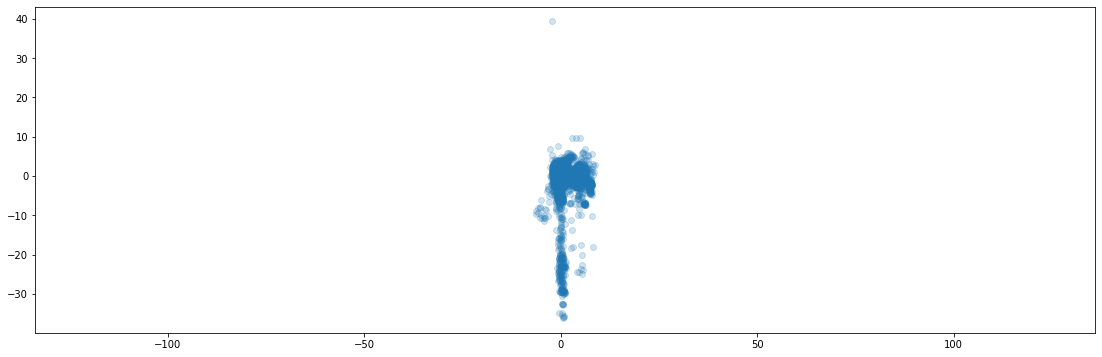

In [58]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)


# plot data
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [59]:
X_train

array([[-0.59914806, -0.15087292, -0.26960293, -0.78596284],
       [-0.42691106, -1.18537534, -1.83165778,  0.41904511],
       [ 0.37582343,  0.39550074, -1.52338914, -0.12405013],
       ...,
       [-0.06637781,  0.07391398, -1.04405441, -0.25316377],
       [-0.28360781, -0.14257054, -0.43276955,  0.1153089 ],
       [-0.18019362,  0.71395031, -0.13115856, -0.30680185]])

# **Implementing K-Means Clustering**

In [61]:
X=X_train

In [62]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 0 0 ... 0 0 0]


In [63]:
dataset['Cluster']=cluster_labels

In [64]:
dataset.head()

InvoiceNo StockCode  ... CustomerID_random  Cluster
209268    555200     71459  ...           17315.0        0
207108    554974     21128  ...           14031.0        0
167085    550972     21086  ...           14031.0        0
471836    576652     22812  ...           17198.0        0
115865    546157     22180  ...           13502.0        0

[5 rows x 15 columns]

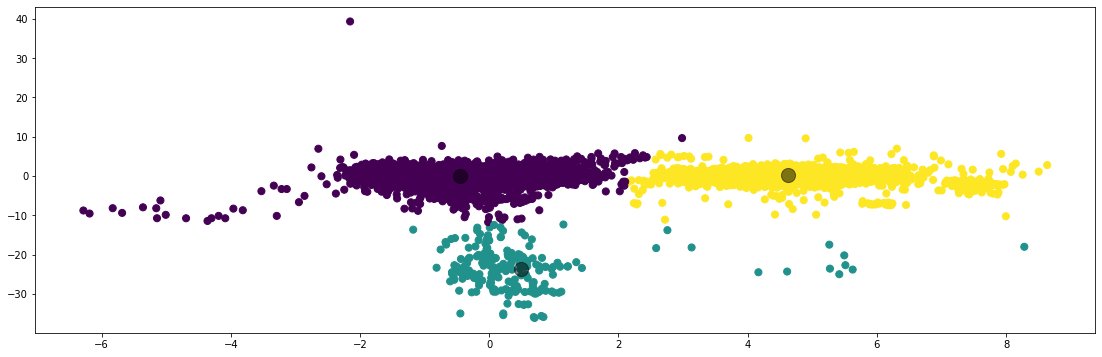

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [66]:
clusterer.cluster_centers_

array([[-4.47020568e-01,  3.43507461e-02, -4.09946198e-02,
        -3.59790234e-03],
       [ 4.98264486e-01, -2.36805476e+01,  4.69198609e+00,
        -3.93798461e+00],
       [ 4.62300862e+00,  1.84404980e-01,  3.17903682e-01,
         1.27188219e-01]])

# **RFM For Cluster**

   CustomerID  Recency  Frequency  MonetaryValue  Cluster_Id
0     12346.0      326          1       77183.60           0
1     12347.0        3         27         588.48           0
2     12348.0      319          5         443.52           0
3     12349.0       19         15         578.21           0
4     12350.0      311          2          42.90           0
5     12352.0       37         19         506.68           0
6     12353.0      205          2          59.70           0
7     12354.0      233          6          94.45           0
8     12355.0      215          3         165.30           0
9     12356.0      246          7         427.40           2


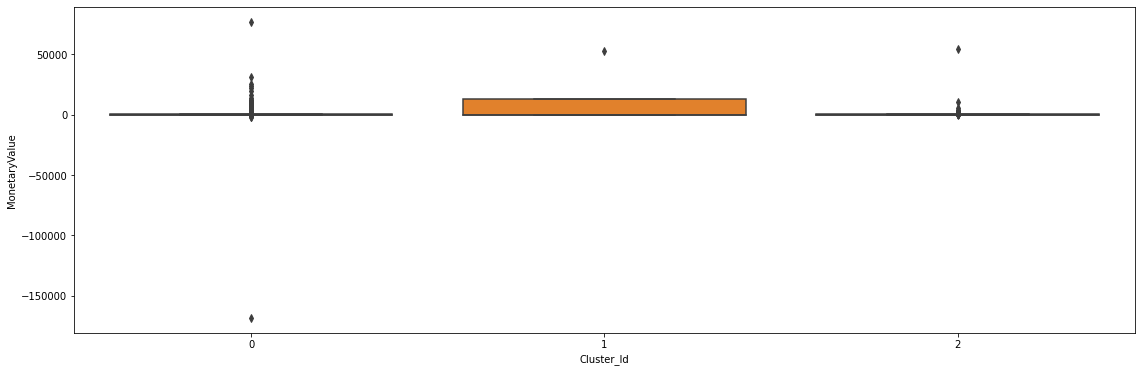

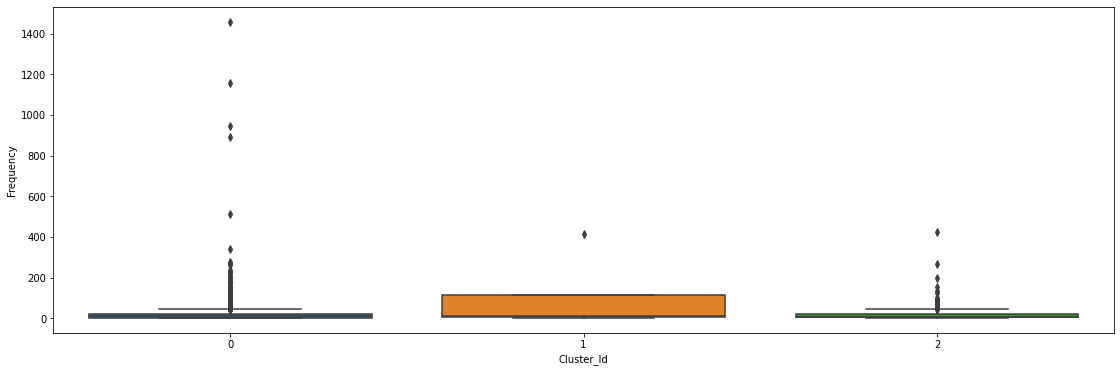

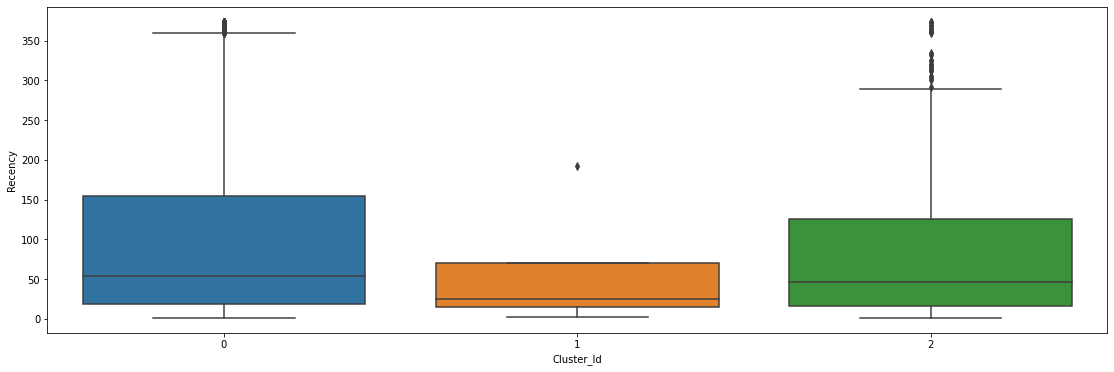

In [67]:
# assign the label
customers['Cluster_Id'] =cluster_labels[0:4092]
print(customers.head(10))

# Box plot to visualize Cluster Id vs MonetaryValue

sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=customers)
plt.show()

# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=customers)
plt.show()

# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=customers)
plt.show()


# **Implementing K-Means Clustering with Silhoutte**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
range_n_clusters = [2,3,4,5,7,8,10]

For n_clusters = 2 The average silhouette_score is : 0.611432364435861
For n_clusters = 3 The average silhouette_score is : 0.6194838287845018
For n_clusters = 4 The average silhouette_score is : 0.3372942137064119
For n_clusters = 5 The average silhouette_score is : 0.2748597164906843
For n_clusters = 7 The average silhouette_score is : 0.2809492799812412
For n_clusters = 8 The average silhouette_score is : 0.25979222243476296
For n_clusters = 10 The average silhouette_score is : 0.22728886796555026


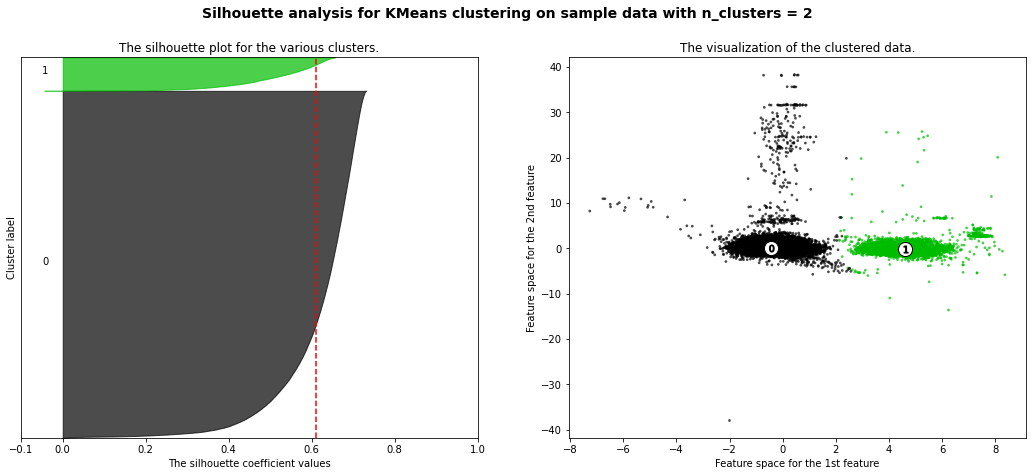

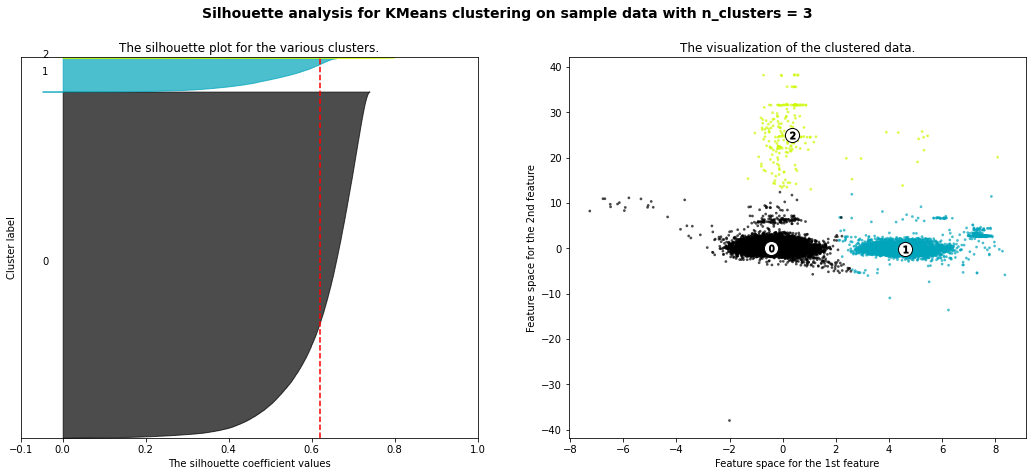

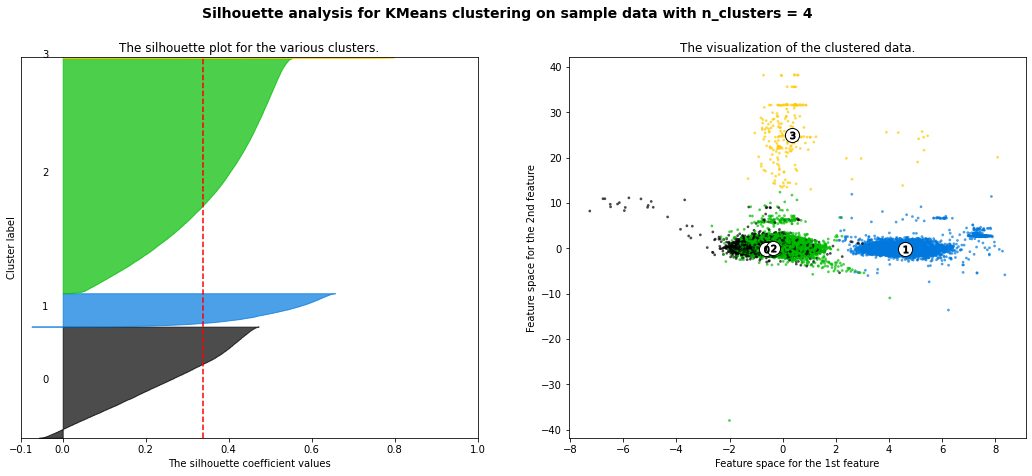

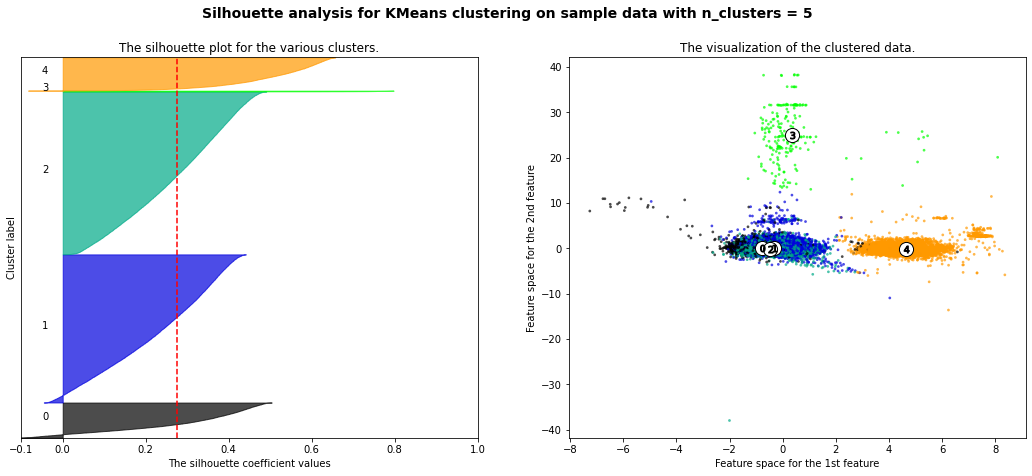

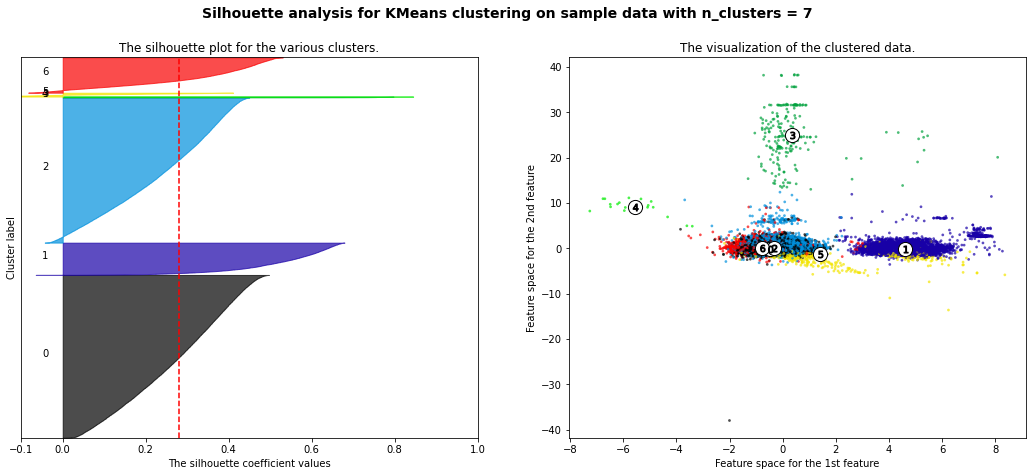

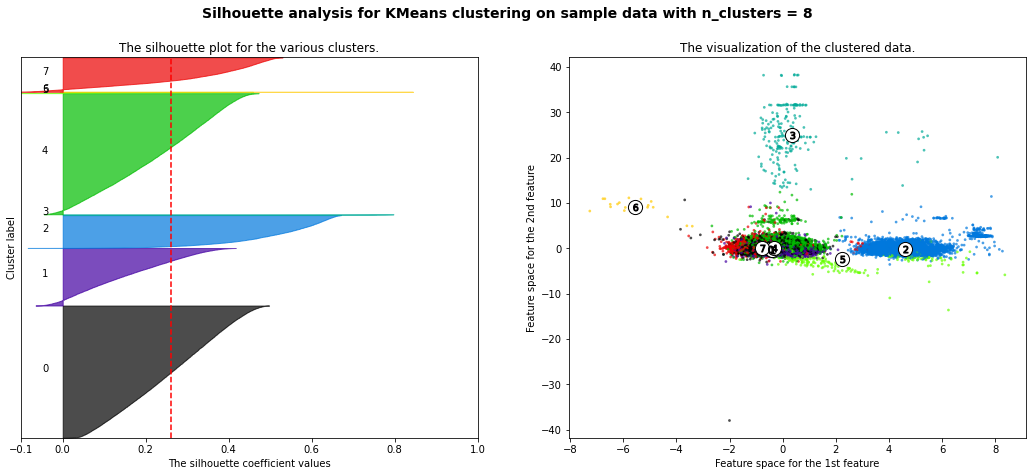

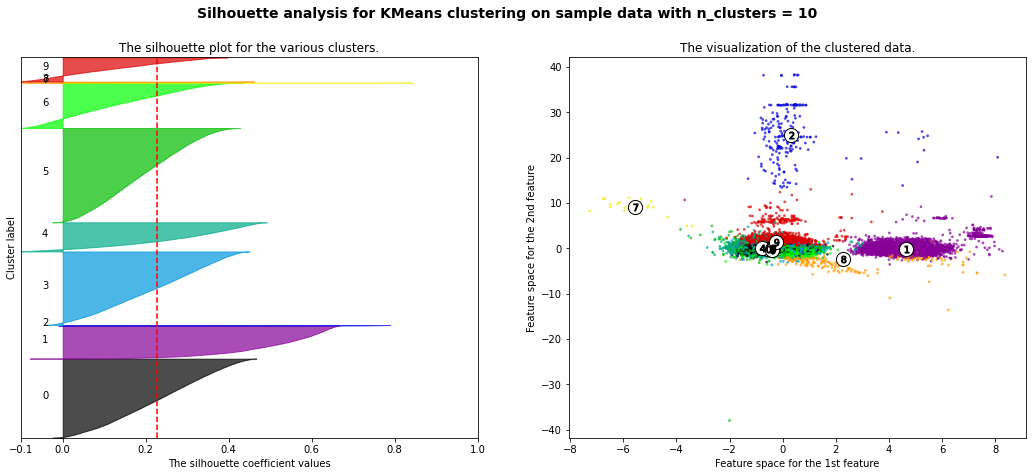

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Implementing K-Means Clustering with Elbow method**

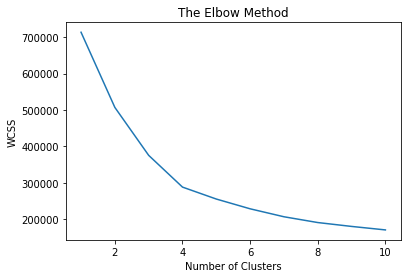

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f09590699d0>,
                 k=None, metric=None, model=None, timings=False)

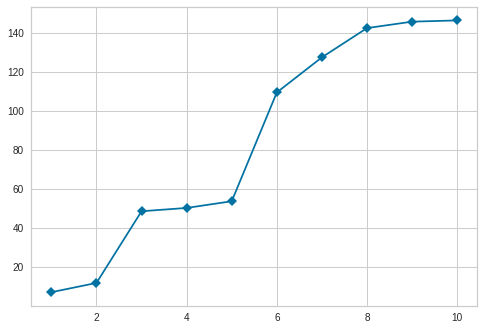

In [ ]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,11), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(X)        # Fit the data to the visualizer

# **Implementing Hierarchical Clustering**

In [ ]:
X = X_train[0:10001]

In [ ]:
len(X)

10001

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

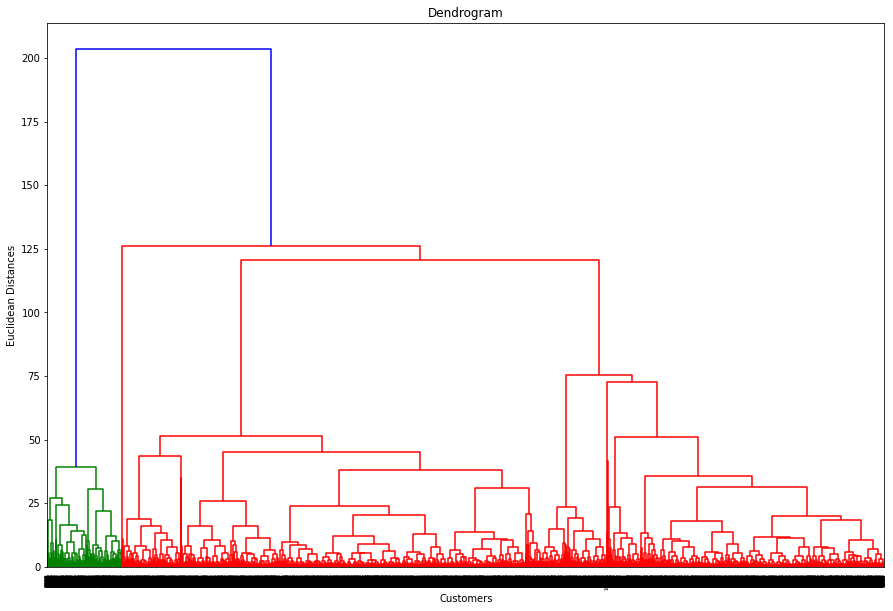

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# **Implmenting Density-Based Spatial Clustering Of Applications With Noise   (DBSCAN)**

Estimated number of clusters: 2
Estimated number of noise points: 39095
Homogeneity: 0.293
Completeness: 0.125
V-measure: 0.176
Adjusted Rand Index: 0.117
Adjusted Mutual Information: 0.176
Silhouette Coefficient: 0.148


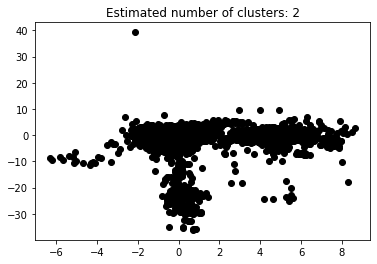

In [68]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler



X = X_train
labels_true=cluster_labels

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Number of clusters: 2
Homogeneity: 0.29255870310898774
Completeness: 0.12546008655432925
V-measure: 0.176
Adjusted Rand Index: 0.117
Adjusted Mutual Information: 0.176
Silhouette Coefficient: 0.148


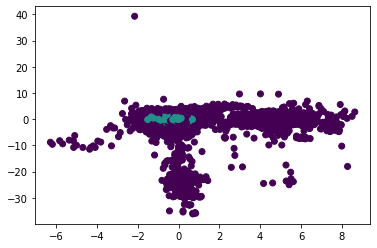

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = X_train
y=cluster_labels
y_pred = DBSCAN(eps=0.3, min_samples=100).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))